# GlacIAnalys:


##***PROYECTO AI Saturdays : Glaciares y Deshielo***🧊:
+ **Alumnos**: Celia Millán, Daniel López, Ana Aragón, Laura Castro, Jorge Benitez
+ **Mentores**: Alejandro, Miguel B, Jorge G

  ## Objetivos☝:

    ``
    ⭐Nuestro objetivo principal es: Tener un Dataset para entrenar a nuestro modelo
    ``

    Este proyecto es una investigación sobre la pérdida de masa y volumen de los glaciares aplicando la inteligencia Artificial para realizar **prediciones sobre el estado de algunos glaciares en  2030 y 2050**.

    Para ello hemos realizado una búsqueda de datos recogidos de glaciares teniendo en cuenta su localización, su masa  y su volumen a lo largo del el tiempo.

    Son muchas las instituciones que recogen este tipo de datos, en nuestro caso nos hemos decantado por la recopilación que se ha hecho desde  World Glacier Monitoring Service [**WGMS**](https://wgms.ch/data_databaseversions)

    Nuestro objetivo es crear un único data set a través de un **conjunto de 9 csv** que proporciona WGMS relacionados entre sí a través de identificadores únicos.

    Cuando escojamos las columnas que nos interesen más para nuestro estudio,
    pasaremos a añadir **variables exogenas** como C02 , temperatura, irradiación solar, subida del nivel del mar.


  ## Conjunto de dataset proporcionados por WGMS.


  1. 🧊**glacier.csv**: General (and presumably static) information about each glacier. When submitting a new glacier, assign a temporary WGMS_ID and use this as the WGMS_ID in all other table rows that correspond to this glacier
  2. 🧊**state.csv**: Glacier length, area, and elevation range.
  3. 🧊 **change.csv**: Change in glacier thickness, area, and/or volume – typically from geodetic surveys.
  4. 🧊**mass_balance.csv**: Glacier mass balance measurements by elevation band.
  5. 🧊**mass_balance_overview.csv**: Overview of glacier mass balance surveys.
  6. 🧊**mass_balance_point.csv**: Glacier mass balance measured at specific points (e.g. stakes or pits).
  2. 🧊**front_variation.csv**
  7. 🧊**reconstruction_front_variation.csv**: Glacier length changes reconstructed from historic records and geologic dating.
  9. 🧊**special_event.csv**: Extraordinary events concerning glacier hazards and dramatic glacier changes.



## Preparamos el entorno de trabajo👷‍♀️

In [ ]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix


from typing import Union


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análisis exploratorio de datos🔍:

Es un conjunto de datos **sobre cambios en los glaciares** (longitud, área, volumen, masa) estandarizados y recopilados internacionalmente, basados ​​en observaciones in situ y teledetección, así como en reconstrucciones. publicado por World Glacier Monitoring Service [**WGMS**](https://wgms.ch/data_databaseversions)

- `✍creado` 2024-01-23
- `⏰temporalidad de los datos` 1127/2024

`
`
### 📄 Consideraciones a la hora de analizar `glacier.csv`:

+ este csv contiene Información general (y presumiblemente estática) sobre cada glaciar. Al enviar un nuevo glaciar, asigne un `WGMS_ID` temporal y utilícelo como `WGMS_ID` en todas las demás filas de la tabla que correspondan a este glaciar.

+ ⚠ `Atención` desde WGMS advierten que los datos pueden contener errores e inexactitudes y sugieren que en caso de ambigüedades se les comunique o bien a ellos o a los investigadores e instituciones enumerados en los datos (columnas `INVESTIGADOR` y `SPONS_AGENCY`).


###🧊DATASET 1 **Glacier.csv**:
- dataset resultante: **clean_glacier_df**

In [ ]:
#leemos el archivo y representamos sus primeras 10 líneas
glacier_df = pd.read_csv('/content/drive/MyDrive/DATASETS/glacier.csv')
glacier_df.head(10)

<ipython-input-3-4b6b463e2270>:2: DtypeWarning: Columns (3,4,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  glacier_df = pd.read_csv('/content/drive/MyDrive/DATASETS/glacier.csv')


,POLITICAL_UNIT,NAME,WGMS_ID,GEN_LOCATION,SPEC_LOCATION,LATITUDE,LONGITUDE,PRIM_CLASSIFIC,FORM,FRONTAL_CHARS,EXPOS_ACC_AREA,EXPOS_ABL_AREA,PARENT_GLACIER,REMARKS,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,AF,PIR YAKH,10452,UPPER CABUL RIVER BASIN,CHUMAR VALLEY,35.595001,70.169998,6.0,3.0,8.0,NE,NE,NaN,Local people call this glacier PIR YAKH which ...,ASW,ASW-01
1,AF,RGI60-13.10763,156232,NaN,NaN,37.262384,73.525069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
2,AF,RGI60-13.10764,156233,NaN,NaN,37.258539,73.546610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
3,AF,RGI60-13.10765,156234,NaN,NaN,37.266134,73.542243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
4,AF,RGI60-13.10766,156235,NaN,NaN,37.273266,73.535659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
5,AF,RGI60-13.10767,156236,NaN,NaN,37.267820,73.557927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
6,AF,RGI60-13.10768,156237,NaN,NaN,37.270174,73.566393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
7,AF,RGI60-13.10769,156238,NaN,NaN,37.273807,73.576475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
8,AF,RGI60-13.10770,156239,NaN,NaN,37.284926,73.579521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
9,AF,RGI60-13.10771,156240,NaN,NaN,37.290455,73.565636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02


In [ ]:
glacier_df['GLACIER_REGION_CODE'].unique()

array(['ASW', 'ASC', 'CEU', 'ANT', 'SAN', 'TRP', 'CAU', 'ASE', 'ACS',
       'ACN', 'ALA', 'WNA', 'ASN', 'GRL', 'ISL', 'SCA', 'NZL', 'RUA',
       'SJM'], dtype=object)

In [ ]:
#info general:
glacier_df.describe()

,WGMS_ID,LATITUDE,LONGITUDE,PRIM_CLASSIFIC,FORM,FRONTAL_CHARS,PARENT_GLACIER
count,214644.000000,214644.000000,214644.000000,3547.000000,3349.000000,3398.000000,405.000000
mean,109392.292512,37.568446,-1.501271,5.454187,2.858167,7.336374,4513.160494
std,62242.576488,33.549702,92.229193,0.955482,1.181502,2.492055,5937.969763
min,0.000000,-82.059998,-179.029999,0.000000,0.000000,0.000000,85.000000
25%,55891.750000,32.942000,-73.618551,5.000000,2.000000,6.000000,2740.000000
50%,109569.500000,41.418001,16.083000,6.000000,3.000000,8.000000,3325.000000
75%,163259.250000,60.234000,78.794000,6.000000,3.000000,9.000000,3754.000000
max,216925.000000,83.554200,177.350204,8.000000,9.000000,9.000000,33649.000000


In [ ]:
glacier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214644 entries, 0 to 214643
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLITICAL_UNIT          214644 non-null  object 
 1   NAME                    214644 non-null  object 
 2   WGMS_ID                 214644 non-null  int64  
 3   GEN_LOCATION            7594 non-null    object 
 4   SPEC_LOCATION           6353 non-null    object 
 5   LATITUDE                214644 non-null  float64
 6   LONGITUDE               214644 non-null  float64
 7   PRIM_CLASSIFIC          3547 non-null    float64
 8   FORM                    3349 non-null    float64
 9   FRONTAL_CHARS           3398 non-null    float64
 10  EXPOS_ACC_AREA          2068 non-null    object 
 11  EXPOS_ABL_AREA          2078 non-null    object 
 12  PARENT_GLACIER          405 non-null     float64
 13  REMARKS                 20879 non-null   object 
 14  GLACIER_REGION_CODE 

In [ ]:
#convertimos a nulos los valores NaN:
columns_glacier = list(glacier_df.columns)
glacier_df[columns_glacier].replace('NaN', np.nan)


,POLITICAL_UNIT,NAME,WGMS_ID,GEN_LOCATION,SPEC_LOCATION,LATITUDE,LONGITUDE,PRIM_CLASSIFIC,FORM,FRONTAL_CHARS,EXPOS_ACC_AREA,EXPOS_ABL_AREA,PARENT_GLACIER,REMARKS,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,AF,PIR YAKH,10452,UPPER CABUL RIVER BASIN,CHUMAR VALLEY,35.595001,70.169998,6.0,3.0,8.0,NE,NE,NaN,Local people call this glacier PIR YAKH which ...,ASW,ASW-01
1,AF,RGI60-13.10763,156232,NaN,NaN,37.262384,73.525069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
2,AF,RGI60-13.10764,156233,NaN,NaN,37.258539,73.546610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
3,AF,RGI60-13.10765,156234,NaN,NaN,37.266134,73.542243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
4,AF,RGI60-13.10766,156235,NaN,NaN,37.273266,73.535659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASC,ASC-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214639,VE,RGI60-16.01388,69769,NaN,NaN,8.540470,-71.046000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRP,TRP-01
214640,VE,RGI60-16.01389,69770,NaN,NaN,8.541140,-71.050400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRP,TRP-01
214641,VE,TIMONCITO,1009,SIERRA NEVADA,CERRO BOLIVAR,8.550000,-71.029999,NaN,NaN,NaN,SE,SE,NaN,NaN,TRP,TRP-01
214642,VE,UNNAMED 26918,26918,NaN,NaN,8.547500,-70.996300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRP,TRP-01


In [ ]:
glacier_df.isna()

,POLITICAL_UNIT,NAME,WGMS_ID,GEN_LOCATION,SPEC_LOCATION,LATITUDE,LONGITUDE,PRIM_CLASSIFIC,FORM,FRONTAL_CHARS,EXPOS_ACC_AREA,EXPOS_ABL_AREA,PARENT_GLACIER,REMARKS,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
2,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
3,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
4,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214639,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
214640,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
214641,False,False,False,False,False,False,False,True,True,True,False,False,True,True,False,False
214642,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False


In [ ]:
# ver la cantidad de valores nulos por cada columna:
glacier_df.isna().sum()


POLITICAL_UNIT                 0
NAME                           0
WGMS_ID                        0
GEN_LOCATION              207050
SPEC_LOCATION             208291
LATITUDE                       0
LONGITUDE                      0
PRIM_CLASSIFIC            211097
FORM                      211295
FRONTAL_CHARS             211246
EXPOS_ACC_AREA            212576
EXPOS_ABL_AREA            212566
PARENT_GLACIER            214239
REMARKS                   193765
GLACIER_REGION_CODE            0
GLACIER_SUBREGION_CODE         0
dtype: int64

In [ ]:
#Aquellas columnas que tengan valores nulos no nos van a servir, así que haremos limpieza de este dataset y nos quedaremos con las columnas necesarias:
clean_glacier_df = pd.DataFrame()
# Iterar sobre cada columna del DataFrame original
for col in glacier_df.columns:
    # Verificar si la columna no tiene valores nulos
    if glacier_df[col].isna().sum() == 0:
        # Si no tiene valores nulos, agregarla al nuevo DataFrame
        clean_glacier_df[col] = glacier_df[col]


In [ ]:
#Vemos como queda el primer df limpio
#clean_glacier_df.drop(columns='GLACIER_SUBREGION_CODE', inplace = True)
clean_glacier_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01
1,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02
2,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02
3,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02
4,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02
5,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02
6,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02
7,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02
8,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02
9,AF,RGI60-13.10771,156240,37.290455,73.565636,ASC,ASC-02



###🧊DATASET 2  **State.csv**:
- dataset resultante: **clean_state_df**


In [ ]:
state_df = pd.read_csv('/content/drive/MyDrive/DATASETS/state.csv')
state_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,SURVEY_DATE,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,ELEVATION_UNC,LENGTH,LENGTH_UNC,AREA,AREA_UNC,SURVEY_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AF,PIR YAKH,10452,2018,20189999,5070.0,NaN,4400.0,NaN,2.1,NaN,1.680000,NaN,NaN,"Abeer Ahmad Sajood, Hedayatullah Arian","Hydrometeorology Department, Geoscience Facult...",NaN,Information derived from field report.
1,AQ,ADAMS,885,1989,19899999,NaN,NaN,NaN,NaN,10.0,NaN,5.730000,NaN,cC,NaN,NaN,WGMS (1993): FoG 1985-1990 (Vol. VI).,NaN
2,AQ,ADAMS,885,1990,19909999,1200.0,785.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGMS (1993): FoG 1985-1990 (Vol. VI).,NaN
3,AQ,ALBERICH,1062,1975,19759999,1800.0,1560.0,1400.0,NaN,1.3,NaN,1.360000,NaN,NaN,NaN,NaN,NaN,NaN
4,AQ,ASTROLABE,3354,1947,19479999,NaN,NaN,NaN,NaN,NaN,NaN,83.500000,NaN,NaN,NaN,NaN,NaN,NaN
5,AQ,ASTROLABE,3354,1963,19639999,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,AQ,ASTROLABE,3354,1973,19739999,NaN,NaN,NaN,NaN,NaN,NaN,78.900002,NaN,NaN,NaN,NaN,NaN,NaN
7,AQ,ASTROLABE,3354,1985,19859999,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,AQ,ASTROLABE,3354,1989,19899999,NaN,NaN,NaN,NaN,NaN,NaN,70.750000,NaN,NaN,NaN,NaN,NaN,NaN
9,AQ,BAHIA DEL DIABLO,2665,2004,20040201,630.0,390.0,50.0,0.5,7.6,0.01,NaN,NaN,xX,"Pedro Skvarca, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey method: Combination of geodetic ground ...


In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10756 entries, 0 to 10755
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POLITICAL_UNIT          10756 non-null  object 
 1   NAME                    10756 non-null  object 
 2   WGMS_ID                 10756 non-null  int64  
 3   YEAR                    10756 non-null  int64  
 4   SURVEY_DATE             10756 non-null  int64  
 5   HIGHEST_ELEVATION       5335 non-null   float64
 6   MEDIAN_ELEVATION        3590 non-null   float64
 7   LOWEST_ELEVATION        9308 non-null   float64
 8   ELEVATION_UNC           1486 non-null   float64
 9   LENGTH                  4817 non-null   float64
 10  LENGTH_UNC              917 non-null    float64
 11  AREA                    5504 non-null   float64
 12  AREA_UNC                566 non-null    float64
 13  SURVEY_PLATFORM_METHOD  5189 non-null   object 
 14  INVESTIGATOR            4068 non-null 

In [ ]:
state_df.isna().sum()

POLITICAL_UNIT                0
NAME                          0
WGMS_ID                       0
YEAR                          0
SURVEY_DATE                   0
HIGHEST_ELEVATION          5421
MEDIAN_ELEVATION           7166
LOWEST_ELEVATION           1448
ELEVATION_UNC              9270
LENGTH                     5939
LENGTH_UNC                 9839
AREA                       5252
AREA_UNC                  10190
SURVEY_PLATFORM_METHOD     5567
INVESTIGATOR               6688
SPONS_AGENCY               6516
REFERENCE                  2731
REMARKS                    7896
dtype: int64

In [ ]:
# creamos una función para quedaros solo con el año de survey_date porque el mes y el día vemos que no suele aparecer:
def only_year(text):
  text = str(text)
  if text == 'nan':
    return 'nan'
  else:
    text = text[:4]
    return text

In [ ]:
# aplicamos función
state_df['SURVEY_DATE'].apply(only_year)

0        2018
1        1989
2        1990
3        1975
4        1947
         ... 
10751    1961
10752    1961
10753    1970
10754    1975
10755    1972
Name: SURVEY_DATE, Length: 10756, dtype: object

In [ ]:
# Revisando nos quedaremos con las siguientes columnas del data set:
# Lista de columnas a mantener en el nuevo DataFrame
columns_state = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR', 'HIGHEST_ELEVATION', 'MEDIAN_ELEVATION', 'LOWEST_ELEVATION', 'LENGTH', 'AREA']

# Crear un nuevo DataFrame para almacenar las columnas seleccionadas
clean_state_df = pd.DataFrame()

# Iterar sobre cada columna en la lista de columnas
for column in columns_state:
    # Si la columna es 'YEAR' o 'SURVEY_DATE', añadir el prefijo 'state_'
    #if column == 'YEAR' or column == 'SURVEY_DATE':
       # new_state[f'state_{column}'] = state[column]
   # else:
   clean_state_df[column] = state_df[column]

In [ ]:
#Revisamos:
clean_state_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA
0,AF,PIR YAKH,10452,2018,5070.0,NaN,4400.0,2.1,1.680000
1,AQ,ADAMS,885,1989,NaN,NaN,NaN,10.0,5.730000
2,AQ,ADAMS,885,1990,1200.0,785.0,370.0,NaN,NaN
3,AQ,ALBERICH,1062,1975,1800.0,1560.0,1400.0,1.3,1.360000
4,AQ,ASTROLABE,3354,1947,NaN,NaN,NaN,NaN,83.500000
5,AQ,ASTROLABE,3354,1963,NaN,NaN,NaN,NaN,75.000000
6,AQ,ASTROLABE,3354,1973,NaN,NaN,NaN,NaN,78.900002
7,AQ,ASTROLABE,3354,1985,NaN,NaN,NaN,NaN,70.000000
8,AQ,ASTROLABE,3354,1989,NaN,NaN,NaN,NaN,70.750000
9,AQ,BAHIA DEL DIABLO,2665,2004,630.0,390.0,50.0,7.6,NaN


In [ ]:
#Rellenaremos los campos de median elevation que sean NA con la media entre el highest y el lowest si existen:
# Verificar si hay filas donde 'MEDIAN_ELEVATION' sea NaN pero 'LOWEST_ELEVATION' y 'HIGHEST_ELEVATION' no lo sean
mask = clean_state_df['MEDIAN_ELEVATION'].isna() & ~clean_state_df['LOWEST_ELEVATION'].isna() & ~clean_state_df['HIGHEST_ELEVATION'].isna()

# Calcular el valor medio para las filas seleccionadas y asignarlo a 'MEDIAN_ELEVATION'
clean_state_df.loc[mask, 'MEDIAN_ELEVATION'] = (clean_state_df.loc[mask, 'LOWEST_ELEVATION'] + clean_state_df.loc[mask, 'HIGHEST_ELEVATION']) / 2

# Ahora, las filas donde 'MEDIAN_ELEVATION' era NaN pero 'LOWEST_ELEVATION' y 'HIGHEST_ELEVATION' tenían datos, tienen 'MEDIAN_ELEVATION' actualizado

In [ ]:
def km_m(area):
  return area * 1000


In [ ]:
clean_state_df['AREA'] = clean_state_df['AREA'].apply(km_m)

In [ ]:
clean_state_df['LENGTH'] = clean_state_df['LENGTH'].apply(km_m)

In [ ]:
clean_state_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA
0,AF,PIR YAKH,10452,2018,5070.0,4735.0,4400.0,2099.9999,1679.9999
1,AQ,ADAMS,885,1989,NaN,NaN,NaN,10000.0000,5730.0000
2,AQ,ADAMS,885,1990,1200.0,785.0,370.0,NaN,NaN
3,AQ,ALBERICH,1062,1975,1800.0,1560.0,1400.0,1300.0000,1360.0000
4,AQ,ASTROLABE,3354,1947,NaN,NaN,NaN,NaN,83500.0000
5,AQ,ASTROLABE,3354,1963,NaN,NaN,NaN,NaN,75000.0000
6,AQ,ASTROLABE,3354,1973,NaN,NaN,NaN,NaN,78900.0020
7,AQ,ASTROLABE,3354,1985,NaN,NaN,NaN,NaN,70000.0000
8,AQ,ASTROLABE,3354,1989,NaN,NaN,NaN,NaN,70750.0000
9,AQ,BAHIA DEL DIABLO,2665,2004,630.0,390.0,50.0,7599.9999,NaN


In [ ]:
clean_state_df['AREA'].isna().sum()

5252

In [ ]:
grafic_1_state_df  = clean_state_df[clean_state_df['NAME'] == 'BAHIA DEL DIABLO']


In [ ]:
grafic_1_state_df

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA
9,AQ,BAHIA DEL DIABLO,2665,2004,630.0,390.0,50.0,7599.9999,NaN
10,AQ,BAHIA DEL DIABLO,2665,2008,NaN,NaN,NaN,NaN,14300.0
11,AQ,BAHIA DEL DIABLO,2665,2010,630.0,390.0,50.0,7599.9999,14300.0
12,AQ,BAHIA DEL DIABLO,2665,2014,630.0,390.0,50.0,7599.9999,12900.0
13,AQ,BAHIA DEL DIABLO,2665,2015,630.0,390.0,50.0,7599.9999,12900.0
14,AQ,BAHIA DEL DIABLO,2665,2016,630.0,390.0,50.0,7599.9999,12900.0
15,AQ,BAHIA DEL DIABLO,2665,2020,630.0,390.0,50.0,7600.0000,12900.0
16,AQ,BAHIA DEL DIABLO,2665,2023,630.0,390.0,50.0,7500.0000,12810.0


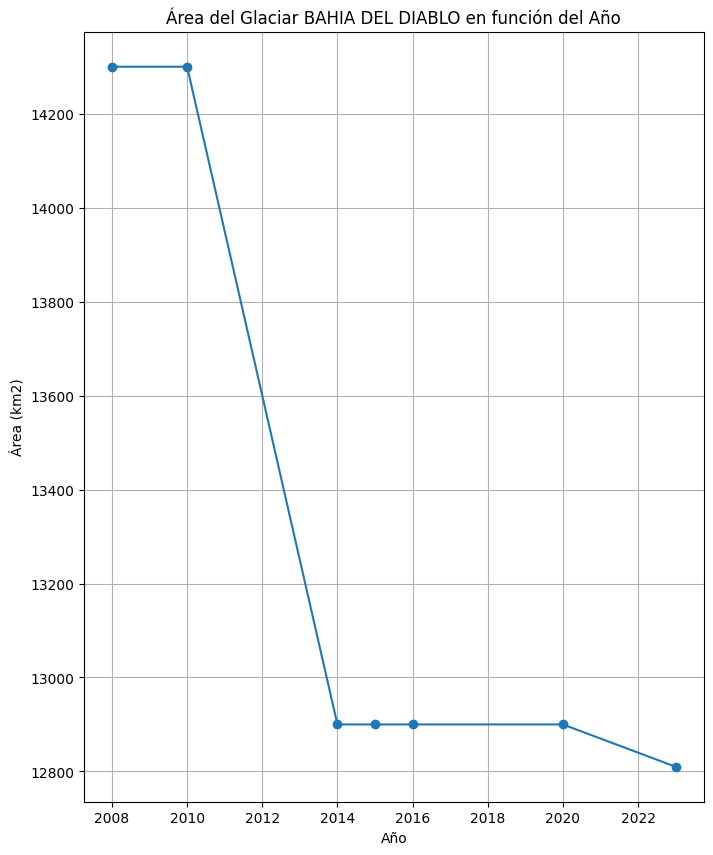

In [ ]:
plt.figure(figsize = (8,10))
plt.plot(grafic_1_state_df['YEAR'], grafic_1_state_df['AREA'], marker = 'o', linestyle='-')
plt.title('Área del Glaciar BAHIA DEL DIABLO en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Área (km2)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
plt.show()  # Muestra el gráfico

In [ ]:
clean_state_df['NAME'].value_counts()

NAME
VERNAGT F.                52
MORTERATSCH, VADRET DA    48
GRIES                     38
RHONE                     37
TS.TUYUKSUYSKIY           37
                          ..
ROSSFIRN-E                 1
ROSSFIRN-W                 1
ROSSI VADRET DEI           1
ROTBLATT-I                 1
TIMONCITO                  1
Name: count, Length: 3583, dtype: int64

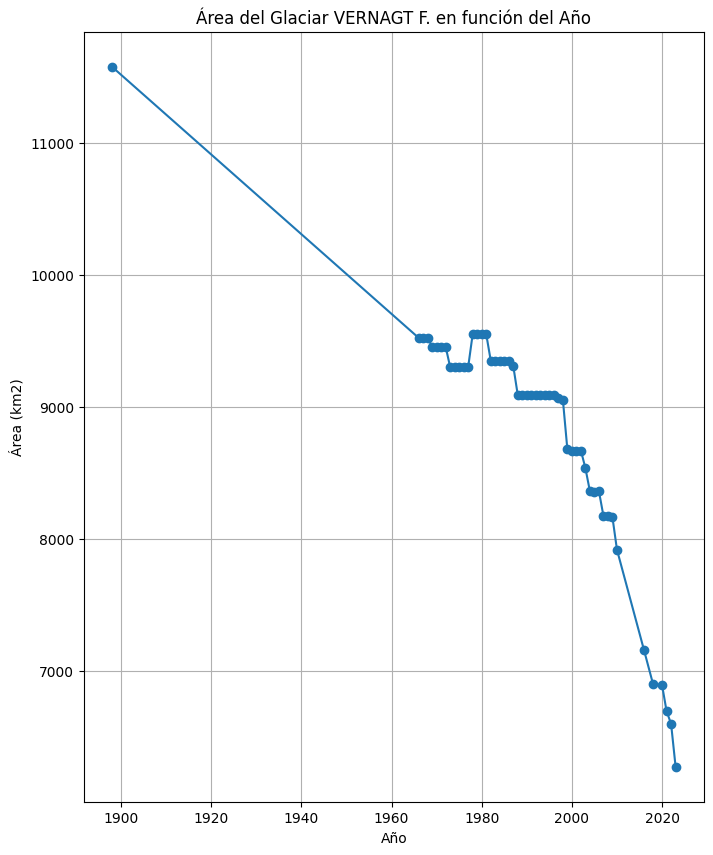

In [ ]:

grafic_2_state_df = clean_state_df[clean_state_df['NAME'] == 'VERNAGT F.']
plt.figure(figsize = (8,10))
plt.plot(grafic_2_state_df['YEAR'], grafic_2_state_df['AREA'], marker = 'o', linestyle='-')
plt.title('Área del Glaciar VERNAGT F. en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Área (km2)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
plt.show()  # Muestra el gráfico

In [ ]:
# Conclusión: vamo a morir todos


###🧊DATASET 3  **Change.csv**:
- dataset resultante: **clean_change_df**

In [ ]:
# Vamos a limpiar el siguiente dataset, change.csv
change_df = pd.read_csv('/content/drive/MyDrive/DATASETS/change.csv')
change_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,SURVEY_ID,YEAR,SURVEY_DATE,REFERENCE_DATE,LOWER_BOUND,UPPER_BOUND,AREA_SURVEY_YEAR,...,THICKNESS_CHG,THICKNESS_CHG_UNC,VOLUME_CHANGE,VOLUME_CHANGE_UNC,SD_PLATFORM_METHOD,RD_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AF,RGI60-13.10763,156232,808792,2004,20041231,19991231.0,9999,9999,1.010,...,-1535.0,3650.0,-1550.0,3690.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1,AF,RGI60-13.10763,156232,808793,2019,20191231,19991231.0,9999,9999,1.010,...,-4420.0,3840.0,-4460.0,3880.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
2,AF,RGI60-13.10763,156232,808794,2009,20091231,20041231.0,9999,9999,1.010,...,-1265.0,3515.0,-1275.0,3550.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
3,AF,RGI60-13.10763,156232,808795,2014,20141231,20091231.0,9999,9999,1.010,...,-915.0,3620.0,-920.0,3660.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
4,AF,RGI60-13.10763,156232,808796,2019,20191231,20141231.0,9999,9999,1.010,...,-715.0,3620.0,-720.0,3660.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
5,AF,RGI60-13.10764,156233,808797,2004,20041231,19991231.0,9999,9999,0.061,...,-3920.0,7580.0,-235.0,465.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
6,AF,RGI60-13.10764,156233,808798,2019,20191231,19991231.0,9999,9999,0.061,...,-3780.0,8220.0,-220.0,500.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
7,AF,RGI60-13.10764,156233,808799,2009,20091231,20041231.0,9999,9999,0.061,...,-1805.0,6990.0,-110.0,425.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
8,AF,RGI60-13.10764,156233,808800,2014,20141231,20091231.0,9999,9999,0.061,...,360.0,7065.0,20.0,430.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
9,AF,RGI60-13.10764,156233,808801,2019,20191231,20141231.0,9999,9999,0.061,...,1575.0,7755.0,95.0,470.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...


In [ ]:
change_df.tail(15)

,POLITICAL_UNIT,NAME,WGMS_ID,SURVEY_ID,YEAR,SURVEY_DATE,REFERENCE_DATE,LOWER_BOUND,UPPER_BOUND,AREA_SURVEY_YEAR,...,THICKNESS_CHG,THICKNESS_CHG_UNC,VOLUME_CHANGE,VOLUME_CHANGE_UNC,SD_PLATFORM_METHOD,RD_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
1143287,VE,RGI60-16.01389,69770,254892,2009,20091231,20041231.0,9999,9999,0.095,...,115.0,8580.0,10.0,815.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143288,VE,RGI60-16.01389,69770,254893,2014,20141231,20091231.0,9999,9999,0.095,...,-2770.0,9340.0,-260.0,890.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143289,VE,RGI60-16.01389,69770,254894,2019,20191231,20141231.0,9999,9999,0.095,...,-5175.0,10990.0,-490.0,1055.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143290,VE,UNNAMED 26918,26918,90731,2012,20120201,20000216.0,9999,9999,0.186,...,-1459.0,5531.0,-271.0,1029.0,sZ,sZ,Thorsten Seehaus,"German Reseach Foundation, DFG, Grant BR2105/1...","Braun et al. 2019; Nature Climate Change 9,130...","Glacier outlines and area from RGI6.0, surface..."
1143291,VE,UNNAMED 26918,26918,254895,2004,20041231,19991231.0,9999,9999,0.186,...,-6690.0,5420.0,-1240.0,1060.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143292,VE,UNNAMED 26918,26918,254896,2019,20191231,19991231.0,9999,9999,0.186,...,-8780.0,6440.0,-1620.0,1280.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143293,VE,UNNAMED 26918,26918,254897,2009,20091231,20041231.0,9999,9999,0.186,...,-3180.0,5295.0,-590.0,995.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143294,VE,UNNAMED 26918,26918,254898,2014,20141231,20091231.0,9999,9999,0.186,...,-1180.0,5580.0,-215.0,1035.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143295,VE,UNNAMED 26918,26918,254899,2019,20191231,20141231.0,9999,9999,0.186,...,2275.0,6510.0,420.0,1215.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143296,VE,UNNAMED 26919,26919,90732,2012,20120201,20000216.0,9999,9999,0.456,...,-8443.0,2435.0,-3850.0,1110.0,sZ,sZ,Thorsten Seehaus,"German Reseach Foundation, DFG, Grant BR2105/1...","Braun et al. 2019; Nature Climate Change 9,130...","Glacier outlines and area from RGI6.0, surface..."


In [ ]:
change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143302 entries, 0 to 1143301
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   POLITICAL_UNIT      1143302 non-null  object 
 1   NAME                1143302 non-null  object 
 2   WGMS_ID             1143302 non-null  int64  
 3   SURVEY_ID           1143302 non-null  int64  
 4   YEAR                1143302 non-null  int64  
 5   SURVEY_DATE         1143302 non-null  int64  
 6   REFERENCE_DATE      1142799 non-null  float64
 7   LOWER_BOUND         1143302 non-null  int64  
 8   UPPER_BOUND         1143302 non-null  int64  
 9   AREA_SURVEY_YEAR    1140570 non-null  float64
 10  AREA_CHANGE         6567 non-null     float64
 11  AREA_CHANGE_UNC     1713 non-null     float64
 12  THICKNESS_CHG       1141074 non-null  float64
 13  THICKNESS_CHG_UNC   1133804 non-null  float64
 14  VOLUME_CHANGE       1040926 non-null  float64
 15  VOLUME_CHANGE_U

In [ ]:
change_df.count()

POLITICAL_UNIT        1143302
NAME                  1143302
WGMS_ID               1143302
SURVEY_ID             1143302
YEAR                  1143302
SURVEY_DATE           1143302
REFERENCE_DATE        1142799
LOWER_BOUND           1143302
UPPER_BOUND           1143302
AREA_SURVEY_YEAR      1140570
AREA_CHANGE              6567
AREA_CHANGE_UNC          1713
THICKNESS_CHG         1141074
THICKNESS_CHG_UNC     1133804
VOLUME_CHANGE         1040926
VOLUME_CHANGE_UNC     1036571
SD_PLATFORM_METHOD    1139945
RD_PLATFORM_METHOD    1137971
INVESTIGATOR          1135487
SPONS_AGENCY          1135339
REFERENCE             1141575
REMARKS               1135952
dtype: int64

In [ ]:
change_df.isna().sum()

POLITICAL_UNIT              0
NAME                        0
WGMS_ID                     0
SURVEY_ID                   0
YEAR                        0
SURVEY_DATE                 0
REFERENCE_DATE            503
LOWER_BOUND                 0
UPPER_BOUND                 0
AREA_SURVEY_YEAR         2732
AREA_CHANGE           1136735
AREA_CHANGE_UNC       1141589
THICKNESS_CHG            2228
THICKNESS_CHG_UNC        9498
VOLUME_CHANGE          102376
VOLUME_CHANGE_UNC      106731
SD_PLATFORM_METHOD       3357
RD_PLATFORM_METHOD       5331
INVESTIGATOR             7815
SPONS_AGENCY             7963
REFERENCE                1727
REMARKS                  7350
dtype: int64

In [ ]:
change_df['LOWER_BOUND'].replace(9999, np.nan, inplace=True)
change_df['UPPER_BOUND'].replace(9999, np.nan, inplace=True)

In [ ]:
change_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,SURVEY_ID,YEAR,SURVEY_DATE,REFERENCE_DATE,LOWER_BOUND,UPPER_BOUND,AREA_SURVEY_YEAR,...,THICKNESS_CHG,THICKNESS_CHG_UNC,VOLUME_CHANGE,VOLUME_CHANGE_UNC,SD_PLATFORM_METHOD,RD_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AF,RGI60-13.10763,156232,808792,2004,20041231,19991231.0,NaN,NaN,1.010,...,-1535.0,3650.0,-1550.0,3690.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1,AF,RGI60-13.10763,156232,808793,2019,20191231,19991231.0,NaN,NaN,1.010,...,-4420.0,3840.0,-4460.0,3880.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
2,AF,RGI60-13.10763,156232,808794,2009,20091231,20041231.0,NaN,NaN,1.010,...,-1265.0,3515.0,-1275.0,3550.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
3,AF,RGI60-13.10763,156232,808795,2014,20141231,20091231.0,NaN,NaN,1.010,...,-915.0,3620.0,-920.0,3660.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
4,AF,RGI60-13.10763,156232,808796,2019,20191231,20141231.0,NaN,NaN,1.010,...,-715.0,3620.0,-720.0,3660.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
5,AF,RGI60-13.10764,156233,808797,2004,20041231,19991231.0,NaN,NaN,0.061,...,-3920.0,7580.0,-235.0,465.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
6,AF,RGI60-13.10764,156233,808798,2019,20191231,19991231.0,NaN,NaN,0.061,...,-3780.0,8220.0,-220.0,500.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
7,AF,RGI60-13.10764,156233,808799,2009,20091231,20041231.0,NaN,NaN,0.061,...,-1805.0,6990.0,-110.0,425.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
8,AF,RGI60-13.10764,156233,808800,2014,20141231,20091231.0,NaN,NaN,0.061,...,360.0,7065.0,20.0,430.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
9,AF,RGI60-13.10764,156233,808801,2019,20191231,20141231.0,NaN,NaN,0.061,...,1575.0,7755.0,95.0,470.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...


In [ ]:
change_df.tail(15)

,POLITICAL_UNIT,NAME,WGMS_ID,SURVEY_ID,YEAR,SURVEY_DATE,REFERENCE_DATE,LOWER_BOUND,UPPER_BOUND,AREA_SURVEY_YEAR,...,THICKNESS_CHG,THICKNESS_CHG_UNC,VOLUME_CHANGE,VOLUME_CHANGE_UNC,SD_PLATFORM_METHOD,RD_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
1143287,VE,RGI60-16.01389,69770,254892,2009,20091231,20041231.0,NaN,NaN,0.095,...,115.0,8580.0,10.0,815.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143288,VE,RGI60-16.01389,69770,254893,2014,20141231,20091231.0,NaN,NaN,0.095,...,-2770.0,9340.0,-260.0,890.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143289,VE,RGI60-16.01389,69770,254894,2019,20191231,20141231.0,NaN,NaN,0.095,...,-5175.0,10990.0,-490.0,1055.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143290,VE,UNNAMED 26918,26918,90731,2012,20120201,20000216.0,NaN,NaN,0.186,...,-1459.0,5531.0,-271.0,1029.0,sZ,sZ,Thorsten Seehaus,"German Reseach Foundation, DFG, Grant BR2105/1...","Braun et al. 2019; Nature Climate Change 9,130...","Glacier outlines and area from RGI6.0, surface..."
1143291,VE,UNNAMED 26918,26918,254895,2004,20041231,19991231.0,NaN,NaN,0.186,...,-6690.0,5420.0,-1240.0,1060.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143292,VE,UNNAMED 26918,26918,254896,2019,20191231,19991231.0,NaN,NaN,0.186,...,-8780.0,6440.0,-1620.0,1280.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143293,VE,UNNAMED 26918,26918,254897,2009,20091231,20041231.0,NaN,NaN,0.186,...,-3180.0,5295.0,-590.0,995.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143294,VE,UNNAMED 26918,26918,254898,2014,20141231,20091231.0,NaN,NaN,0.186,...,-1180.0,5580.0,-215.0,1035.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143295,VE,UNNAMED 26918,26918,254899,2019,20191231,20141231.0,NaN,NaN,0.186,...,2275.0,6510.0,420.0,1215.0,sP,sP,Romain Hugonnet,"LEGOS, Université Toulouse, France; VAW, ETH Z...","Hugonnet et al. (2021); Nature, 592, 726-731 p.",Only glaciers with >50% spatial coverage are i...
1143296,VE,UNNAMED 26919,26919,90732,2012,20120201,20000216.0,NaN,NaN,0.456,...,-8443.0,2435.0,-3850.0,1110.0,sZ,sZ,Thorsten Seehaus,"German Reseach Foundation, DFG, Grant BR2105/1...","Braun et al. 2019; Nature Climate Change 9,130...","Glacier outlines and area from RGI6.0, surface..."


In [ ]:
change_df['AREA_CHANGE'].isna().sum()

1136735

In [ ]:
list(change_df.columns)

['POLITICAL_UNIT',
 'NAME',
 'WGMS_ID',
 'SURVEY_ID',
 'YEAR',
 'SURVEY_DATE',
 'REFERENCE_DATE',
 'LOWER_BOUND',
 'UPPER_BOUND',
 'AREA_SURVEY_YEAR',
 'AREA_CHANGE',
 'AREA_CHANGE_UNC',
 'THICKNESS_CHG',
 'THICKNESS_CHG_UNC',
 'VOLUME_CHANGE',
 'VOLUME_CHANGE_UNC',
 'SD_PLATFORM_METHOD',
 'RD_PLATFORM_METHOD',
 'INVESTIGATOR',
 'SPONS_AGENCY',
 'REFERENCE',
 'REMARKS']

In [ ]:
# Revisando nos quedaremos con las siguientes columnas del data set:
# Lista de columnas a mantener en el nuevo DataFrame
columns_change = ['POLITICAL_UNIT',
 'NAME',
 'WGMS_ID',
 'YEAR',
 'AREA_CHANGE',
 'THICKNESS_CHG',
 'VOLUME_CHANGE']

# Crear un nuevo DataFrame para almacenar las columnas seleccionadas
clean_change_df = pd.DataFrame()

# Iterar sobre cada columna en la lista de columnas
for column in columns_change:
   clean_change_df[column] = change_df[column]

In [ ]:
# revisamos:
clean_change_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA_CHANGE,THICKNESS_CHG,VOLUME_CHANGE
0,AF,RGI60-13.10763,156232,2004,NaN,-1535.0,-1550.0
1,AF,RGI60-13.10763,156232,2019,NaN,-4420.0,-4460.0
2,AF,RGI60-13.10763,156232,2009,NaN,-1265.0,-1275.0
3,AF,RGI60-13.10763,156232,2014,NaN,-915.0,-920.0
4,AF,RGI60-13.10763,156232,2019,NaN,-715.0,-720.0
5,AF,RGI60-13.10764,156233,2004,NaN,-3920.0,-235.0
6,AF,RGI60-13.10764,156233,2019,NaN,-3780.0,-220.0
7,AF,RGI60-13.10764,156233,2009,NaN,-1805.0,-110.0
8,AF,RGI60-13.10764,156233,2014,NaN,360.0,20.0
9,AF,RGI60-13.10764,156233,2019,NaN,1575.0,95.0


In [ ]:
clean_change_df.tail(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA_CHANGE,THICKNESS_CHG,VOLUME_CHANGE
1143287,VE,RGI60-16.01389,69770,2009,NaN,115.0,10.0
1143288,VE,RGI60-16.01389,69770,2014,NaN,-2770.0,-260.0
1143289,VE,RGI60-16.01389,69770,2019,NaN,-5175.0,-490.0
1143290,VE,UNNAMED 26918,26918,2012,NaN,-1459.0,-271.0
1143291,VE,UNNAMED 26918,26918,2004,NaN,-6690.0,-1240.0
1143292,VE,UNNAMED 26918,26918,2019,NaN,-8780.0,-1620.0
1143293,VE,UNNAMED 26918,26918,2009,NaN,-3180.0,-590.0
1143294,VE,UNNAMED 26918,26918,2014,NaN,-1180.0,-215.0
1143295,VE,UNNAMED 26918,26918,2019,NaN,2275.0,420.0
1143296,VE,UNNAMED 26919,26919,2012,NaN,-8443.0,-3850.0


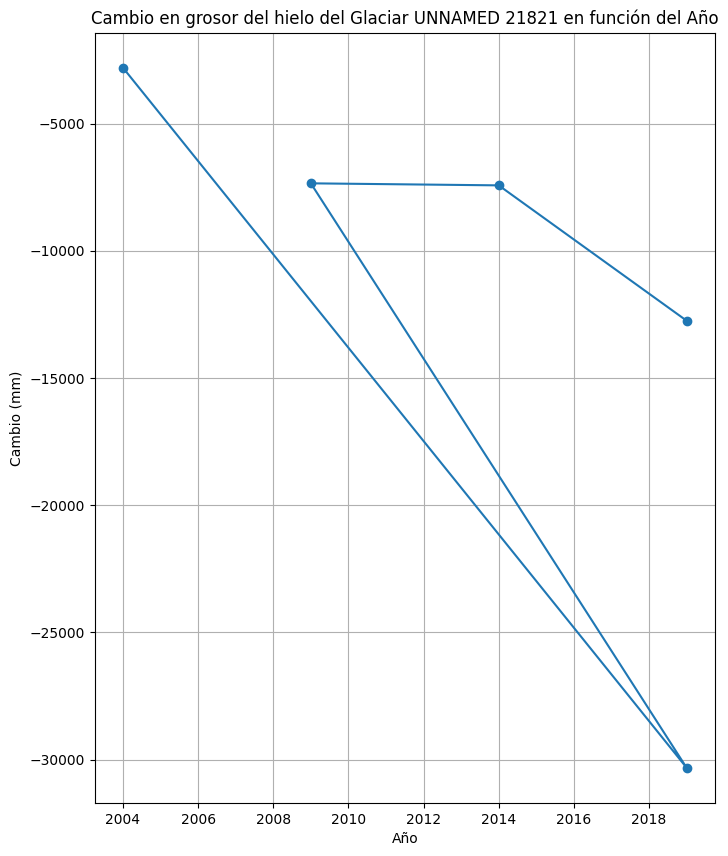

In [ ]:
grafic_change_df = []
grafic_change_df = clean_change_df[clean_change_df['NAME'] == 'UNNAMED 21821']
plt.figure(figsize = (8,10))
plt.plot(grafic_change_df['YEAR'], grafic_change_df['VOLUME_CHANGE'], marker = 'o', linestyle='-')
plt.title('Cambio en grosor del hielo del Glaciar UNNAMED 21821 en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Cambio (mm)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
plt.show()  # Muestra el gráfico

In [ ]:
grafic_change_df

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA_CHANGE,THICKNESS_CHG,VOLUME_CHANGE
843279,NZ,UNNAMED 21821,21821,2012,NaN,-8597.0,NaN
843280,NZ,UNNAMED 21821,21821,2015,NaN,-9895.0,NaN
843281,NZ,UNNAMED 21821,21821,2017,NaN,-13803.0,NaN
843282,NZ,UNNAMED 21821,21821,2018,NaN,-7734.0,NaN
843283,NZ,UNNAMED 21821,21821,2015,NaN,-12573.0,NaN
...,...,...,...,...,...,...,...
843686,NZ,UNNAMED 21821,21821,2004,NaN,-1365.0,-2800.0
843687,NZ,UNNAMED 21821,21821,2019,NaN,-14780.0,-30320.0
843688,NZ,UNNAMED 21821,21821,2009,NaN,-3580.0,-7345.0
843689,NZ,UNNAMED 21821,21821,2014,NaN,-3620.0,-7425.0


In [ ]:
mean_by_year = grafic_change_df.groupby('YEAR')['THICKNESS_CHG'].mean()
print(mean_by_year)

YEAR
2004    -1365.000000
2009    -3580.000000
2010   -20169.500000
2011   -16155.250000
2012   -14222.411765
2013   -13737.629630
2014   -12234.857143
2015   -12774.747253
2016   -13423.360825
2017   -13749.898148
2018   -18999.000000
2019   -10497.500000
Name: THICKNESS_CHG, dtype: float64


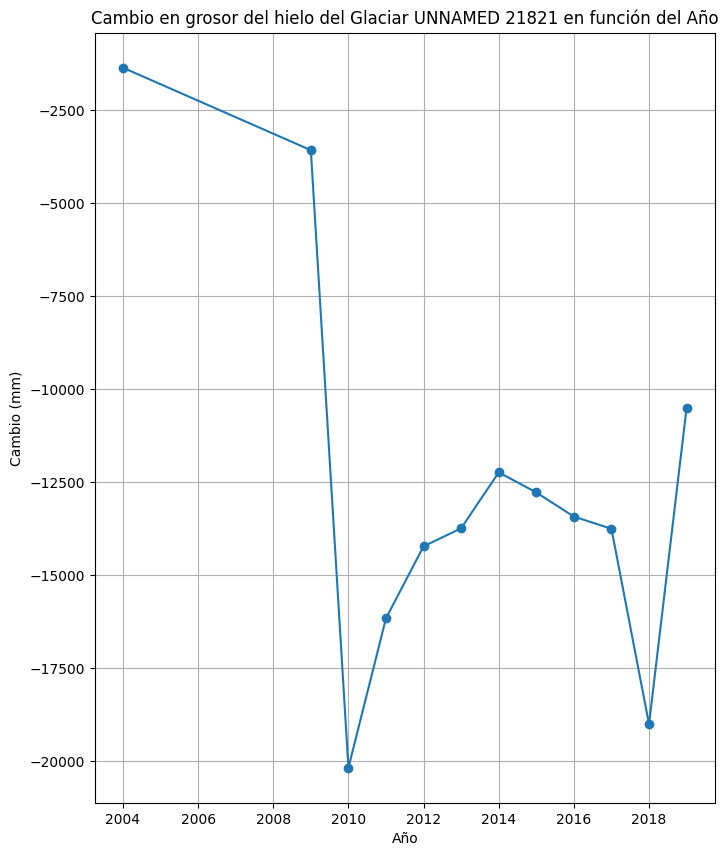

In [ ]:

plt.figure(figsize = (8,10))
plt.plot(mean_by_year, marker = 'o', linestyle='-')
plt.title('Cambio en grosor del hielo del Glaciar UNNAMED 21821 en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Cambio (mm)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
plt.show()  # Muestra el gráfico


###🧊DATASET 4  **Mass_balance.csv**:
- dataset resultante: **mass_balance_df**

In [ ]:
mass_balance_df = pd.read_csv('/content/drive/MyDrive/DATASETS/mass_balance.csv')
mass_balance_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,LOWER_BOUND,UPPER_BOUND,AREA,WINTER_BALANCE,WINTER_BALANCE_UNC,SUMMER_BALANCE,SUMMER_BALANCE_UNC,ANNUAL_BALANCE,ANNUAL_BALANCE_UNC,REMARKS
0,AQ,ALBERICH,1062,1972,9999,9999,1.36,0.0,NaN,10.0,NaN,20.0,NaN,NaN
1,AQ,ALBERICH,1062,1973,9999,9999,1.36,0.0,NaN,30.0,NaN,30.0,NaN,NaN
2,AQ,ALBERICH,1062,1974,9999,9999,1.36,-10.0,NaN,0.0,NaN,-20.0,NaN,NaN
3,AQ,ALBERICH,1062,1975,9999,9999,1.36,10.0,NaN,0.0,NaN,10.0,NaN,NaN
4,AQ,ANVERS I ICE CAP,3954,1966,9999,9999,NaN,NaN,NaN,NaN,NaN,44.0,NaN,Multi-annual observation (87 mm w.e.) evenly d...
5,AQ,ANVERS I ICE CAP,3954,1967,9999,9999,NaN,NaN,NaN,NaN,NaN,44.0,NaN,Multi-annual observation (87 mm w.e.) evenly d...
6,AQ,BAHIA DEL DIABLO,2665,2000,38,112,NaN,NaN,NaN,NaN,NaN,-2300.0,NaN,Balance based on old area.
7,AQ,BAHIA DEL DIABLO,2665,2000,112,188,NaN,NaN,NaN,NaN,NaN,-1650.0,NaN,Balance based on old area.
8,AQ,BAHIA DEL DIABLO,2665,2000,188,262,NaN,NaN,NaN,NaN,NaN,-1250.0,NaN,Balance based on old area.
9,AQ,BAHIA DEL DIABLO,2665,2000,262,338,NaN,NaN,NaN,NaN,NaN,-680.0,NaN,Balance based on old area.


In [ ]:
mass_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54249 entries, 0 to 54248
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POLITICAL_UNIT      54249 non-null  object 
 1   NAME                54249 non-null  object 
 2   WGMS_ID             54249 non-null  int64  
 3   YEAR                54249 non-null  int64  
 4   LOWER_BOUND         54249 non-null  int64  
 5   UPPER_BOUND         54249 non-null  int64  
 6   AREA                50286 non-null  float64
 7   WINTER_BALANCE      40149 non-null  float64
 8   WINTER_BALANCE_UNC  6529 non-null   float64
 9   SUMMER_BALANCE      39805 non-null  float64
 10  SUMMER_BALANCE_UNC  6101 non-null   float64
 11  ANNUAL_BALANCE      54069 non-null  float64
 12  ANNUAL_BALANCE_UNC  10254 non-null  float64
 13  REMARKS             17419 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 5.8+ MB


In [ ]:
mass_balance_df.isna().sum()

POLITICAL_UNIT            0
NAME                      0
WGMS_ID                   0
YEAR                      0
LOWER_BOUND               0
UPPER_BOUND               0
AREA                   3963
WINTER_BALANCE        14100
WINTER_BALANCE_UNC    47720
SUMMER_BALANCE        14444
SUMMER_BALANCE_UNC    48148
ANNUAL_BALANCE          180
ANNUAL_BALANCE_UNC    43995
REMARKS               36830
dtype: int64

In [ ]:
# Leyendo la documentación vemos que este dataset se complementa con el de mass_balance_overview asi que vamos a juntarlos.

###🧊DATASET 5  **Mass_balance_overviwe.csv**:
- dataset resultante: **mass_balance_ov_df**

In [ ]:
mass_balance_ov_df = pd.read_csv('/content/drive/MyDrive/DATASETS/mass_balance_overview.csv')
mass_balance_ov_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,TIME_SYSTEM,BEGIN_PERIOD,END_WINTER,END_PERIOD,ELA_PREFIX,ELA,...,MAX_SITES_ABL,ACC_AREA,ACC_AREA_UNC,ABL_AREA,ABL_AREA_UNC,AAR,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AF,PIR YAKH,10452,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Abeer Ahmad Sajood, Hedayatullah Arian","Hydrometeorology Department, Geoscience Facult...",NaN,Index point measurements only.
1,AQ,ALBERICH,1062,1972,OTH,19710206.0,NaN,19720118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
2,AQ,ALBERICH,1062,1973,OTH,19720118.0,NaN,19730122.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
3,AQ,ALBERICH,1062,1974,OTH,19730122.0,NaN,19740122.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
4,AQ,ALBERICH,1062,1975,OTH,19740122.0,NaN,19750110.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
5,AQ,ANVERS I ICE CAP,3954,1966,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data from Cogley (2008, updated 2013) based on...",Multi-annual observation (87 mm w.e.) evenly d...
6,AQ,ANVERS I ICE CAP,3954,1967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data from Cogley (2008, updated 2013) based on...",Multi-annual observation (87 mm w.e.) evenly d...
7,AQ,BAHIA DEL DIABLO,2665,2000,COM,19990301.0,NaN,20000228.0,NaN,427.0,...,NaN,NaN,NaN,NaN,NaN,34.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...
8,AQ,BAHIA DEL DIABLO,2665,2001,COM,20000301.0,NaN,20010228.0,NaN,375.0,...,NaN,NaN,NaN,NaN,NaN,52.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...
9,AQ,BAHIA DEL DIABLO,2665,2002,COM,20010301.0,NaN,20020228.0,NaN,438.0,...,NaN,NaN,NaN,NaN,NaN,33.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","Instituto Antártico Argentino, Glaciology Divi...",NaN,Series has been revised according to new glaci...


### 💥💥 MERGEAMOS🧊🧊 DATASET 4 Y 5  
- Mass_balance + Mass_balance_overviwe.csv
- dataset resultante: **clean_mass_merged_df**

In [ ]:
# mergeamos los dos datasets en base al campo nombre y el campo año.
mass_merged_df = pd.merge(mass_balance_df, mass_balance_ov_df, on=['NAME', 'YEAR', 'POLITICAL_UNIT','WGMS_ID'], suffixes=('_mass_balance', '_mass_balance_ov'))

In [ ]:
mass_merged_df.describe()

,WGMS_ID,YEAR,LOWER_BOUND,UPPER_BOUND,AREA,WINTER_BALANCE,WINTER_BALANCE_UNC,SUMMER_BALANCE,SUMMER_BALANCE_UNC,ANNUAL_BALANCE,...,ELA_UNC,MIN_SITES_ACC,MAX_SITES_ACC,MIN_SITES_ABL,MAX_SITES_ABL,ACC_AREA,ACC_AREA_UNC,ABL_AREA,ABL_AREA_UNC,AAR
count,54249.000000,54249.000000,54249.000000,54249.000000,50286.000000,40149.000000,6529.000000,39805.000000,6101.000000,54069.000000,...,11843.000000,20350.000000,16122.000000,19963.000000,1.578500e+04,32083.000000,11697.000000,32091.000000,11938.000000,48802.000000
mean,1897.159450,1995.501576,3600.173441,3657.583513,9.581129,1313.969279,76.110584,-2322.094423,82.335683,-973.157341,...,24.152706,24.955332,80.188686,32.289886,7.641142e+03,4.159185,0.115235,9.396132,0.127562,40.940835
std,7597.481364,21.705685,2892.389958,2872.380034,220.625808,943.319577,97.971324,2796.022477,107.703823,2681.769364,...,88.233650,375.051021,582.143361,49.231447,2.756228e+05,17.907815,0.322577,108.684782,0.382124,27.380892
min,0.000000,1885.000000,0.000000,50.000000,0.000000,-4720.000000,0.000000,-161839.000000,5.000000,-160574.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,332.000000,1982.000000,1600.000000,1650.000000,0.084000,725.000000,20.000000,-3075.000000,20.000000,-1706.000000,...,10.000000,1.000000,2.000000,7.000000,9.000000e+00,0.313120,0.010000,0.963750,0.010000,18.000000
50%,491.000000,2000.000000,2900.000000,2950.000000,0.269000,1162.000000,50.000000,-1909.000000,50.000000,-520.000000,...,10.000000,5.000000,6.000000,14.000000,1.800000e+01,1.350000,0.010000,2.030000,0.010000,41.000000
75%,1331.000000,2013.000000,3800.000000,3900.000000,0.853004,1712.000000,100.000000,-1000.000000,100.000000,250.000000,...,30.000000,15.000000,31.000000,32.000000,4.000000e+01,3.675625,0.050000,4.799000,0.050000,62.000000
max,167234.000000,2024.000000,9999.000000,9999.000000,32100.000000,10915.000000,1053.000000,4901.000000,1150.000000,15050.000000,...,1995.000000,53026.000000,53026.000000,386.000000,9.999999e+06,1317.000000,4.000000,2829.000000,4.000000,100.000000


In [ ]:
mass_merged_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,LOWER_BOUND,UPPER_BOUND,AREA,WINTER_BALANCE,WINTER_BALANCE_UNC,SUMMER_BALANCE,...,MAX_SITES_ABL,ACC_AREA,ACC_AREA_UNC,ABL_AREA,ABL_AREA_UNC,AAR,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS_mass_balance_ov
0,AQ,ALBERICH,1062,1972,9999,9999,1.36,0.0,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
1,AQ,ALBERICH,1062,1973,9999,9999,1.36,0.0,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
2,AQ,ALBERICH,1062,1974,9999,9999,1.36,-10.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
3,AQ,ALBERICH,1062,1975,9999,9999,1.36,10.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,"Data from Dyurgerov, M.(2002): [3] For detaile...",NaN
4,AQ,ANVERS I ICE CAP,3954,1966,9999,9999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data from Cogley (2008, updated 2013) based on...",Multi-annual observation (87 mm w.e.) evenly d...
5,AQ,ANVERS I ICE CAP,3954,1967,9999,9999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data from Cogley (2008, updated 2013) based on...",Multi-annual observation (87 mm w.e.) evenly d...
6,AQ,BAHIA DEL DIABLO,2665,2000,38,112,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...
7,AQ,BAHIA DEL DIABLO,2665,2000,112,188,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...
8,AQ,BAHIA DEL DIABLO,2665,2000,188,262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...
9,AQ,BAHIA DEL DIABLO,2665,2000,262,338,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Series has been revised according to new glaci...


In [ ]:
mass_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54249 entries, 0 to 54248
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   POLITICAL_UNIT           54249 non-null  object 
 1   NAME                     54249 non-null  object 
 2   WGMS_ID                  54249 non-null  int64  
 3   YEAR                     54249 non-null  int64  
 4   LOWER_BOUND              54249 non-null  int64  
 5   UPPER_BOUND              54249 non-null  int64  
 6   AREA                     50286 non-null  float64
 7   WINTER_BALANCE           40149 non-null  float64
 8   WINTER_BALANCE_UNC       6529 non-null   float64
 9   SUMMER_BALANCE           39805 non-null  float64
 10  SUMMER_BALANCE_UNC       6101 non-null   float64
 11  ANNUAL_BALANCE           54069 non-null  float64
 12  ANNUAL_BALANCE_UNC       10254 non-null  float64
 13  REMARKS_mass_balance     17419 non-null  object 
 14  TIME_SYSTEM           

In [ ]:
mass_merged_df.isna().sum()

POLITICAL_UNIT                 0
NAME                           0
WGMS_ID                        0
YEAR                           0
LOWER_BOUND                    0
UPPER_BOUND                    0
AREA                        3963
WINTER_BALANCE             14100
WINTER_BALANCE_UNC         47720
SUMMER_BALANCE             14444
SUMMER_BALANCE_UNC         48148
ANNUAL_BALANCE               180
ANNUAL_BALANCE_UNC         43995
REMARKS_mass_balance       36830
TIME_SYSTEM                22288
BEGIN_PERIOD                6212
END_WINTER                 19131
END_PERIOD                  5788
ELA_PREFIX                 48439
ELA                         4169
ELA_UNC                    42406
MIN_SITES_ACC              33899
MAX_SITES_ACC              38127
MIN_SITES_ABL              34286
MAX_SITES_ABL              38464
ACC_AREA                   22166
ACC_AREA_UNC               42552
ABL_AREA                   22158
ABL_AREA_UNC               42311
AAR                         5447
INVESTIGAT

* Borraremos las columnas que contengan 'UNC' ya que solo son márgenes de error, los comentarios de las columnas 'REMARKS',

* TIME_SYSTEM: Puede no ser relevante para la predicción del deshielo en sí
misma, ya que se refiere al sistema de medición del tiempo y no a características específicas del glaciar.

* BEGIN_PERIOD, END_WINTER, END_PERIOD: Aunque estas columnas proporcionan información temporal, si nuestro objetivo es predecir el deshielo futuro, es posible que puedas prescindir de ellas, especialmente si ya tienes una columna que representa el año del balance de masa.

* MIN_SITES_ACC, MAX_SITES_ACC, MIN_SITES_ABL, MAX_SITES_ABL: Estas columnas proporcionan información sobre la cantidad de sitios de medición en áreas específicas del glaciar. Pueden ser relevantes si estamos interesados en la distribución espacial de las mediciones, pero podrían no ser cruciales para la predicción del deshielo.

* INVESTIGATOR, SPONS_AGENCY, REFERENCE: Estas columnas contienen metadatos sobre los investigadores, las agencias patrocinadoras y las referencias a las publicaciones. Por lo general, no son características que se utilizan directamente para la predicción.

In [ ]:
# Revisando nos quedaremos con las siguientes columnas del data set:
# Lista de columnas a mantener en el nuevo DataFrame
mass_merged_columns = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR', 'AREA', 'WINTER_BALANCE',
       'SUMMER_BALANCE', 'ANNUAL_BALANCE', 'ELA', 'ACC_AREA', 'ABL_AREA',
       'AAR']

# Crear un nuevo DataFrame para almacenar las columnas seleccionadas
clean_mass_merged_df = pd.DataFrame()

# Iterar sobre cada columna en la lista de columnas
for column in mass_merged_columns:
  clean_mass_merged_df[column] = mass_merged_df[column]

In [ ]:
#cambiaremos los valores 9999 por NaN:
mass_merged_columns = list(clean_mass_merged_df.columns)
clean_mass_merged_df[mass_merged_columns].replace(9999, np.nan, inplace=True)


In [ ]:
clean_mass_merged_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
0,AQ,ALBERICH,1062,1972,1.36,0.0,10.0,20.0,NaN,NaN,NaN,67.0
1,AQ,ALBERICH,1062,1973,1.36,0.0,30.0,30.0,NaN,NaN,NaN,75.0
2,AQ,ALBERICH,1062,1974,1.36,-10.0,0.0,-20.0,NaN,NaN,NaN,35.0
3,AQ,ALBERICH,1062,1975,1.36,10.0,0.0,10.0,NaN,NaN,NaN,60.0
4,AQ,ANVERS I ICE CAP,3954,1966,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN


In [ ]:
clean_mass_merged_df[clean_mass_merged_df['ABL_AREA'].notnull()].head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
132,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-600.0,325.0,8.0,4.9,62.0
133,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-200.0,325.0,8.0,4.9,62.0
134,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-180.0,325.0,8.0,4.9,62.0
135,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-100.0,325.0,8.0,4.9,62.0
136,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,250.0,325.0,8.0,4.9,62.0


In [ ]:
clean_mass_merged_df['AREA'] = clean_mass_merged_df['AREA'].apply(km_m)

In [ ]:
clean_mass_merged_df['ACC_AREA'] = clean_mass_merged_df['ACC_AREA'].apply(km_m)

In [ ]:
clean_mass_merged_df['ABL_AREA'] = clean_mass_merged_df['ABL_AREA'].apply(km_m)

In [ ]:
clean_mass_merged_df[clean_mass_merged_df['ACC_AREA'].notnull()]

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
132,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-600.000000,325.0,8000.0,4900.0,62.0
133,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-200.000000,325.0,8000.0,4900.0,62.0
134,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-180.000000,325.0,8000.0,4900.0,62.0
135,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,-100.000000,325.0,8000.0,4900.0,62.0
136,AQ,BAHIA DEL DIABLO,2665,2014,NaN,NaN,NaN,250.000000,325.0,8000.0,4900.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54244,UZ,BARKRAK SREDNIY EAST BRANCH,165854,2023,42.984060,NaN,NaN,14.848109,2848.0,276.7,139.0,66.5
54245,UZ,BARKRAK SREDNIY EAST BRANCH,165854,2023,66.810100,NaN,NaN,0.000000,2848.0,276.7,139.0,66.5
54246,UZ,BARKRAK SREDNIY EAST BRANCH,165854,2023,63.420500,NaN,NaN,0.000000,2848.0,276.7,139.0,66.5
54247,UZ,BARKRAK SREDNIY EAST BRANCH,165854,2023,53.489480,NaN,NaN,0.000000,2848.0,276.7,139.0,66.5


In [ ]:
clean_mass_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54249 entries, 0 to 54248
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   POLITICAL_UNIT  54249 non-null  object 
 1   NAME            54249 non-null  object 
 2   WGMS_ID         54249 non-null  int64  
 3   YEAR            54249 non-null  int64  
 4   AREA            50286 non-null  float64
 5   WINTER_BALANCE  40149 non-null  float64
 6   SUMMER_BALANCE  39805 non-null  float64
 7   ANNUAL_BALANCE  54069 non-null  float64
 8   ELA             50080 non-null  float64
 9   ACC_AREA        32083 non-null  float64
 10  ABL_AREA        32091 non-null  float64
 11  AAR             48802 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.0+ MB


copy_mass_merged es la tabla final de los balances de masa por año

In [ ]:
clean_mass_merged_df.isna().sum()

POLITICAL_UNIT        0
NAME                  0
WGMS_ID               0
YEAR                  0
AREA               3963
WINTER_BALANCE    14100
SUMMER_BALANCE    14444
ANNUAL_BALANCE      180
ELA                4169
ACC_AREA          22166
ABL_AREA          22158
AAR                5447
dtype: int64

In [ ]:
graphic_mass_merged_df=clean_mass_merged_df[clean_mass_merged_df['NAME']=='BAHIA DEL DIABLO']

In [ ]:
graphic_mass_merged_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
6,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-2300.0,427.0,NaN,NaN,34.0
7,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-1650.0,427.0,NaN,NaN,34.0
8,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-1250.0,427.0,NaN,NaN,34.0
9,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-680.0,427.0,NaN,NaN,34.0
10,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-250.0,427.0,NaN,NaN,34.0


In [ ]:
# Filtrar el DataFrame para mantener solo las filas con 'mass_YEAR' único y 'AREA' no nulo para hacer una visualización de datos:
graphic_mass_merged_df_filtered = graphic_mass_merged_df[graphic_mass_merged_df['AREA'].notnull()].drop_duplicates(subset=['YEAR'], keep = False)
graphic_mass_merged_df_filtered.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
14,AQ,BAHIA DEL DIABLO,2665,2000,12900.0,NaN,NaN,-570.0,427.0,NaN,NaN,34.0
23,AQ,BAHIA DEL DIABLO,2665,2001,12900.0,NaN,NaN,-60.0,375.0,NaN,NaN,52.0
32,AQ,BAHIA DEL DIABLO,2665,2002,12900.0,NaN,NaN,-560.0,438.0,NaN,NaN,33.0
41,AQ,BAHIA DEL DIABLO,2665,2003,12900.0,NaN,NaN,-180.0,389.0,NaN,NaN,43.0
50,AQ,BAHIA DEL DIABLO,2665,2004,12900.0,NaN,NaN,-120.0,386.0,NaN,NaN,48.0
59,AQ,BAHIA DEL DIABLO,2665,2005,12900.0,NaN,NaN,-140.0,405.0,NaN,NaN,49.0
68,AQ,BAHIA DEL DIABLO,2665,2006,12900.0,NaN,NaN,-450.0,431.0,NaN,NaN,35.0
77,AQ,BAHIA DEL DIABLO,2665,2007,12900.0,NaN,NaN,-140.0,360.0,NaN,NaN,53.0
86,AQ,BAHIA DEL DIABLO,2665,2008,12900.0,NaN,NaN,-440.0,435.0,NaN,NaN,37.0
95,AQ,BAHIA DEL DIABLO,2665,2009,12900.0,NaN,NaN,-330.0,388.0,NaN,NaN,42.0


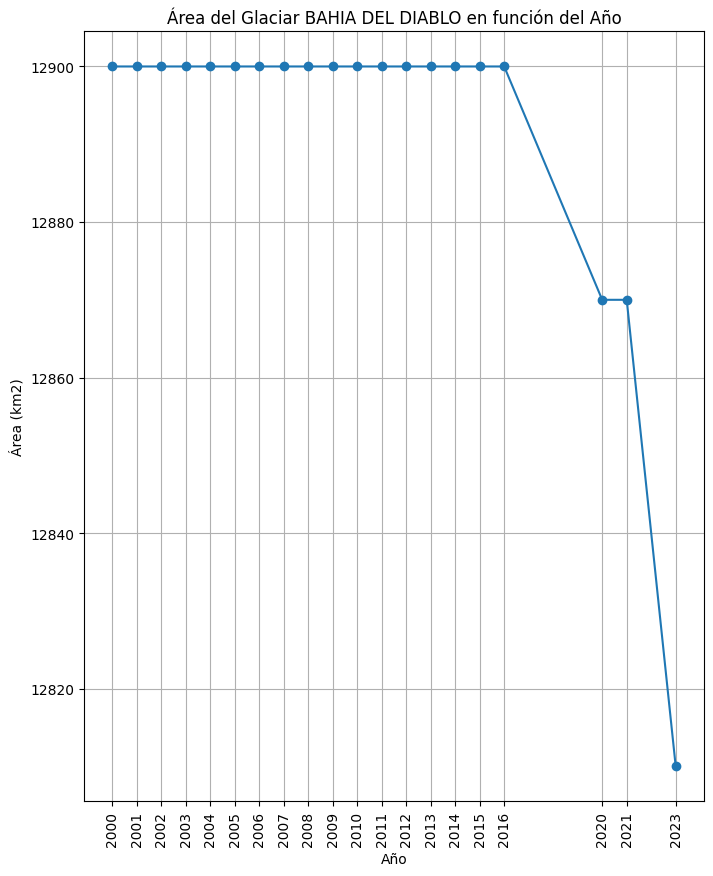

In [ ]:
plt.figure(figsize = (8,10))
plt.plot(graphic_mass_merged_df_filtered['YEAR'], graphic_mass_merged_df_filtered['AREA'], marker = 'o', linestyle='-')
plt.title('Área del Glaciar BAHIA DEL DIABLO en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Área (km2)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
# Establecer la ubicación de los ticks del eje x a intervalos de 1
plt.xticks(graphic_mass_merged_df_filtered['YEAR'], rotation=90)
plt.show()  # Muestra el gráfico

In [ ]:
graphic_mass_merged_df_filtered_2 = graphic_mass_merged_df[graphic_mass_merged_df['ANNUAL_BALANCE'].notnull()]
graphic_mass_merged_df_filtered_2.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
6,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-2300.0,427.0,NaN,NaN,34.0
7,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-1650.0,427.0,NaN,NaN,34.0
8,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-1250.0,427.0,NaN,NaN,34.0
9,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-680.0,427.0,NaN,NaN,34.0
10,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,-250.0,427.0,NaN,NaN,34.0
11,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,80.0,427.0,NaN,NaN,34.0
12,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,280.0,427.0,NaN,NaN,34.0
13,AQ,BAHIA DEL DIABLO,2665,2000,NaN,NaN,NaN,50.0,427.0,NaN,NaN,34.0
14,AQ,BAHIA DEL DIABLO,2665,2000,12900.0,NaN,NaN,-570.0,427.0,NaN,NaN,34.0
15,AQ,BAHIA DEL DIABLO,2665,2001,NaN,NaN,NaN,-1000.0,375.0,NaN,NaN,52.0


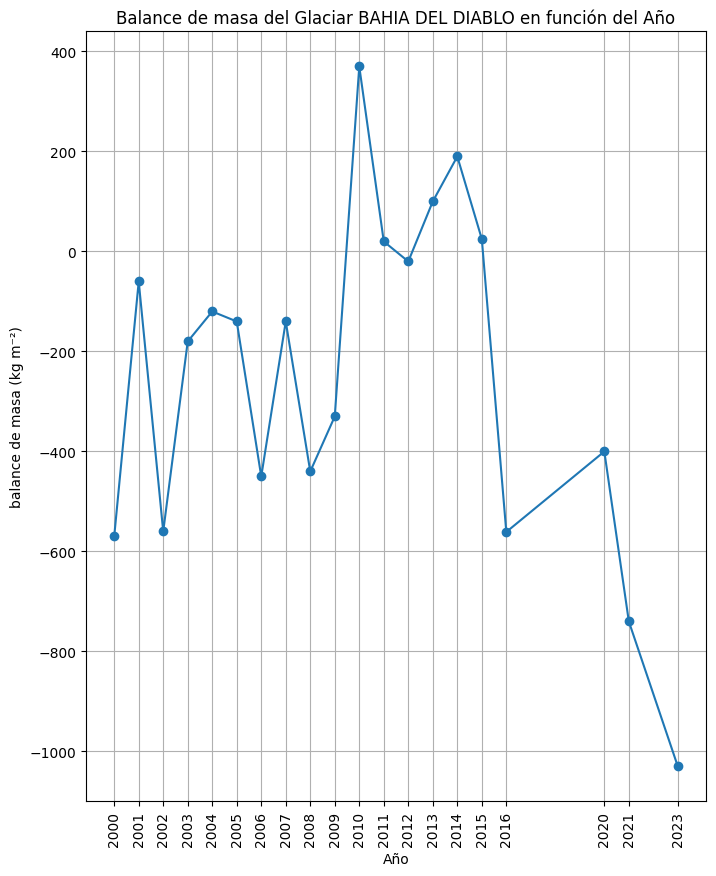

In [ ]:
plt.figure(figsize = (8,10))
plt.plot(graphic_mass_merged_df_filtered['YEAR'], graphic_mass_merged_df_filtered['ANNUAL_BALANCE'], marker = 'o')
plt.title('Balance de masa del Glaciar BAHIA DEL DIABLO en función del Año')  # Establece el título del gráfico
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('balance de masa (kg m⁻²)')  # Etiqueta del eje y
plt.grid(True)  # Muestra una cuadrícula en el gráfico
# Establecer la ubicación de los ticks del eje x a intervalos de 1
plt.xticks(graphic_mass_merged_df_filtered['YEAR'], rotation=90)
plt.show()  # Muestra el gráfico


###🧊DATASET 6 **Mass_balance_point.csv**:
- dataset resultante : **clean_mass_b_point_df**




In [ ]:
# leemos el siguiente csv
mass_b_point_df = pd.read_csv('/content/drive/MyDrive/DATASETS/mass_balance_point.csv')
mass_b_point_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,POINT_ID,FROM_DATE,TO_DATE,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_BALANCE,POINT_BALANCE_UNCERTAINTY,DENSITY,DENSITY_UNCERTAINTY,BALANCE_CODE,REMARKS
0,AF,PIR YAKH,10452,2018,PY10,20170707,20180831,35.59870,70.17995,4541.0,-3413.0,NaN,910.0,NaN,IN,NaN
1,AF,PIR YAKH,10452,2018,PY20,20170707,20180831,35.60075,70.17420,4737.0,-1684.0,NaN,910.0,NaN,IN,NaN
2,AQ,BAHIA DEL DIABLO,2665,2010,1,20090301,20100228,NaN,NaN,100.0,100.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
3,AQ,BAHIA DEL DIABLO,2665,2010,10,20090301,20100228,NaN,NaN,398.0,500.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
4,AQ,BAHIA DEL DIABLO,2665,2010,11,20090301,20100228,NaN,NaN,442.0,600.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
5,AQ,BAHIA DEL DIABLO,2665,2010,12,20090301,20100228,NaN,NaN,456.0,700.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
6,AQ,BAHIA DEL DIABLO,2665,2010,13,20090301,20100228,NaN,NaN,458.0,400.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
7,AQ,BAHIA DEL DIABLO,2665,2010,14,20090301,20100228,NaN,NaN,464.0,600.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
8,AQ,BAHIA DEL DIABLO,2665,2010,15,20090301,20100228,NaN,NaN,445.0,1000.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.
9,AQ,BAHIA DEL DIABLO,2665,2010,16,20090301,20100228,NaN,NaN,505.0,600.0,NaN,NaN,NaN,BA,POINT_ID assigned arbitrary.


In [ ]:
# vemos cuántos valores nulos tiene cada columna:
mass_b_point_df.isna().sum()

POLITICAL_UNIT                   0
NAME                             0
WGMS_ID                          0
YEAR                             0
POINT_ID                         0
FROM_DATE                        0
TO_DATE                          0
POINT_LAT                     4054
POINT_LON                     4054
POINT_ELEVATION               7534
POINT_BALANCE                    0
POINT_BALANCE_UNCERTAINTY    42727
DENSITY                      46265
DENSITY_UNCERTAINTY          50034
BALANCE_CODE                     0
REMARKS                      27730
dtype: int64

In [ ]:
mass_b_point_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57509 entries, 0 to 57508
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   POLITICAL_UNIT             57509 non-null  object 
 1   NAME                       57509 non-null  object 
 2   WGMS_ID                    57509 non-null  int64  
 3   YEAR                       57509 non-null  int64  
 4   POINT_ID                   57509 non-null  object 
 5   FROM_DATE                  57509 non-null  int64  
 6   TO_DATE                    57509 non-null  int64  
 7   POINT_LAT                  53455 non-null  float64
 8   POINT_LON                  53455 non-null  float64
 9   POINT_ELEVATION            49975 non-null  float64
 10  POINT_BALANCE              57509 non-null  float64
 11  POINT_BALANCE_UNCERTAINTY  14782 non-null  float64
 12  DENSITY                    11244 non-null  float64
 13  DENSITY_UNCERTAINTY        7475 non-null   flo

Viendo la documentación y analizándolo, nos quedaremos con las siguientes columnas:
* ``NAME``: El nombre del glaciar.

* ``YEAR``: El año asociado con el último ciclo de acumulación (invierno) - ablación
(verano). Esto te proporcionaría la información temporal necesaria para rastrear los cambios en el tiempo.

* ``FROM_DATE y TO_DATE``: Las fechas de inicio y finalización del ciclo de medición. Esto proporcionaría información sobre la duración de cada medición de balance de masa.

* ``POINT_LAT y POINT_LON``: Las coordenadas geográficas del punto de medición. Esto te permitiría tener en cuenta la ubicación geográfica del glaciar, lo cual puede ser importante para comprender los factores que afectan su balance de masa.

* ``POINT_ELEVATION``: La elevación de la superficie del glaciar en el punto de medición. Esto sería relevante ya que la elevación puede influir significativamente en el balance de masa de un glaciar.

* `` POINT_BALANCE``: El balance de masa medido en el punto de medición. Esto podría ser una de las variables objetivo.

* `` DENSITY``: La densidad del glaciar puede variar espacialmente debido a diferentes condiciones de acumulación de nieve, compactación del hielo, etc. Esta variabilidad espacial puede influir en la respuesta del glaciar al cambio climático y, por lo tanto, podría ser una característica importante para incluir en el modelo.

In [ ]:
mp_columns = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR', 'POINT_ELEVATION', 'POINT_BALANCE']

In [ ]:
clean_mass_b_point_df = pd.DataFrame()
for column in mp_columns:
  #if column == 'mp_YEAR':
   # new_mp[column] = mass_b_point['YEAR']
  #else:
  clean_mass_b_point_df[column] = mass_b_point_df[column]

In [ ]:
clean_mass_b_point_df.head(10)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,POINT_ELEVATION,POINT_BALANCE
0,AF,PIR YAKH,10452,2018,4541.0,-3413.0
1,AF,PIR YAKH,10452,2018,4737.0,-1684.0
2,AQ,BAHIA DEL DIABLO,2665,2010,100.0,100.0
3,AQ,BAHIA DEL DIABLO,2665,2010,398.0,500.0
4,AQ,BAHIA DEL DIABLO,2665,2010,442.0,600.0
5,AQ,BAHIA DEL DIABLO,2665,2010,456.0,700.0
6,AQ,BAHIA DEL DIABLO,2665,2010,458.0,400.0
7,AQ,BAHIA DEL DIABLO,2665,2010,464.0,600.0
8,AQ,BAHIA DEL DIABLO,2665,2010,445.0,1000.0
9,AQ,BAHIA DEL DIABLO,2665,2010,505.0,600.0


In [ ]:
clean_mass_b_point_df.describe()

,WGMS_ID,YEAR,POINT_ELEVATION,POINT_BALANCE
count,57509.000000,57509.000000,49975.000000,57509.000000
mean,1889.999878,2001.012607,2302.447308,-518.044268
std,10177.366010,20.510469,1272.127269,1954.173294
min,0.000000,1885.000000,0.000000,-22890.000000
25%,394.000000,1987.000000,1258.600000,-1690.000000
50%,732.000000,2009.000000,2593.000000,-210.000000
75%,1511.000000,2016.000000,3109.000000,786.000000
max,216746.000000,2023.000000,6331.000000,8810.000000


In [ ]:
clean_mass_b_point_df.isna().sum()

POLITICAL_UNIT        0
NAME                  0
WGMS_ID               0
YEAR                  0
POINT_ELEVATION    7534
POINT_BALANCE         0
dtype: int64

In [ ]:
clean_mass_b_point_df['NAME'].value_counts()

NAME
ABRAMOV                       6544
TS.TUYUKSUYSKIY               4286
GRIES                         2077
WHITE                         2043
SILVRETTA                     1888
                              ... 
CHRISTIAN ERICHSEN ICE CAP       4
NUUSSUAQ                         3
SCHUCHERT                        2
PIR YAKH                         2
SERMIKAVSAK                      1
Name: count, Length: 163, dtype: int64

In [ ]:
graphic_mass_b_point_df = clean_mass_b_point_df[clean_mass_b_point_df['NAME']=='SILVRETTA']
graphic_mass_b_point_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,POINT_ELEVATION,POINT_BALANCE
21679,CH,SILVRETTA,408,1920,2756.0,1870.0
21680,CH,SILVRETTA,408,1920,2756.0,540.0
21681,CH,SILVRETTA,408,1920,2756.0,-1330.0
21682,CH,SILVRETTA,408,1920,3009.0,2250.0
21683,CH,SILVRETTA,408,1920,3009.0,730.0
21684,CH,SILVRETTA,408,1920,3009.0,-1520.0
21685,CH,SILVRETTA,408,1921,3009.0,920.0
21686,CH,SILVRETTA,408,1921,3009.0,-980.0
21687,CH,SILVRETTA,408,1921,3009.0,-1900.0
21688,CH,SILVRETTA,408,1922,2756.0,810.0


In [ ]:
graphic_mass_b_point_df['YEAR'].unique()

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
# los años se repiten varias veces y hay muchos registros asi que haremos la media por año de POINT_ELEVATION:
mean_by_year = graphic_mass_b_point_df.groupby('YEAR')['POINT_ELEVATION'].mean()
print(mean_by_year)

YEAR
1920    2882.500000
1921    3009.000000
1922    2882.000000
1923    2882.000000
1924    2882.000000
           ...     
2018    2719.052632
2019    2695.243902
2020    2732.437500
2021    2736.531250
2022    2746.000000
Name: POINT_ELEVATION, Length: 99, dtype: float64


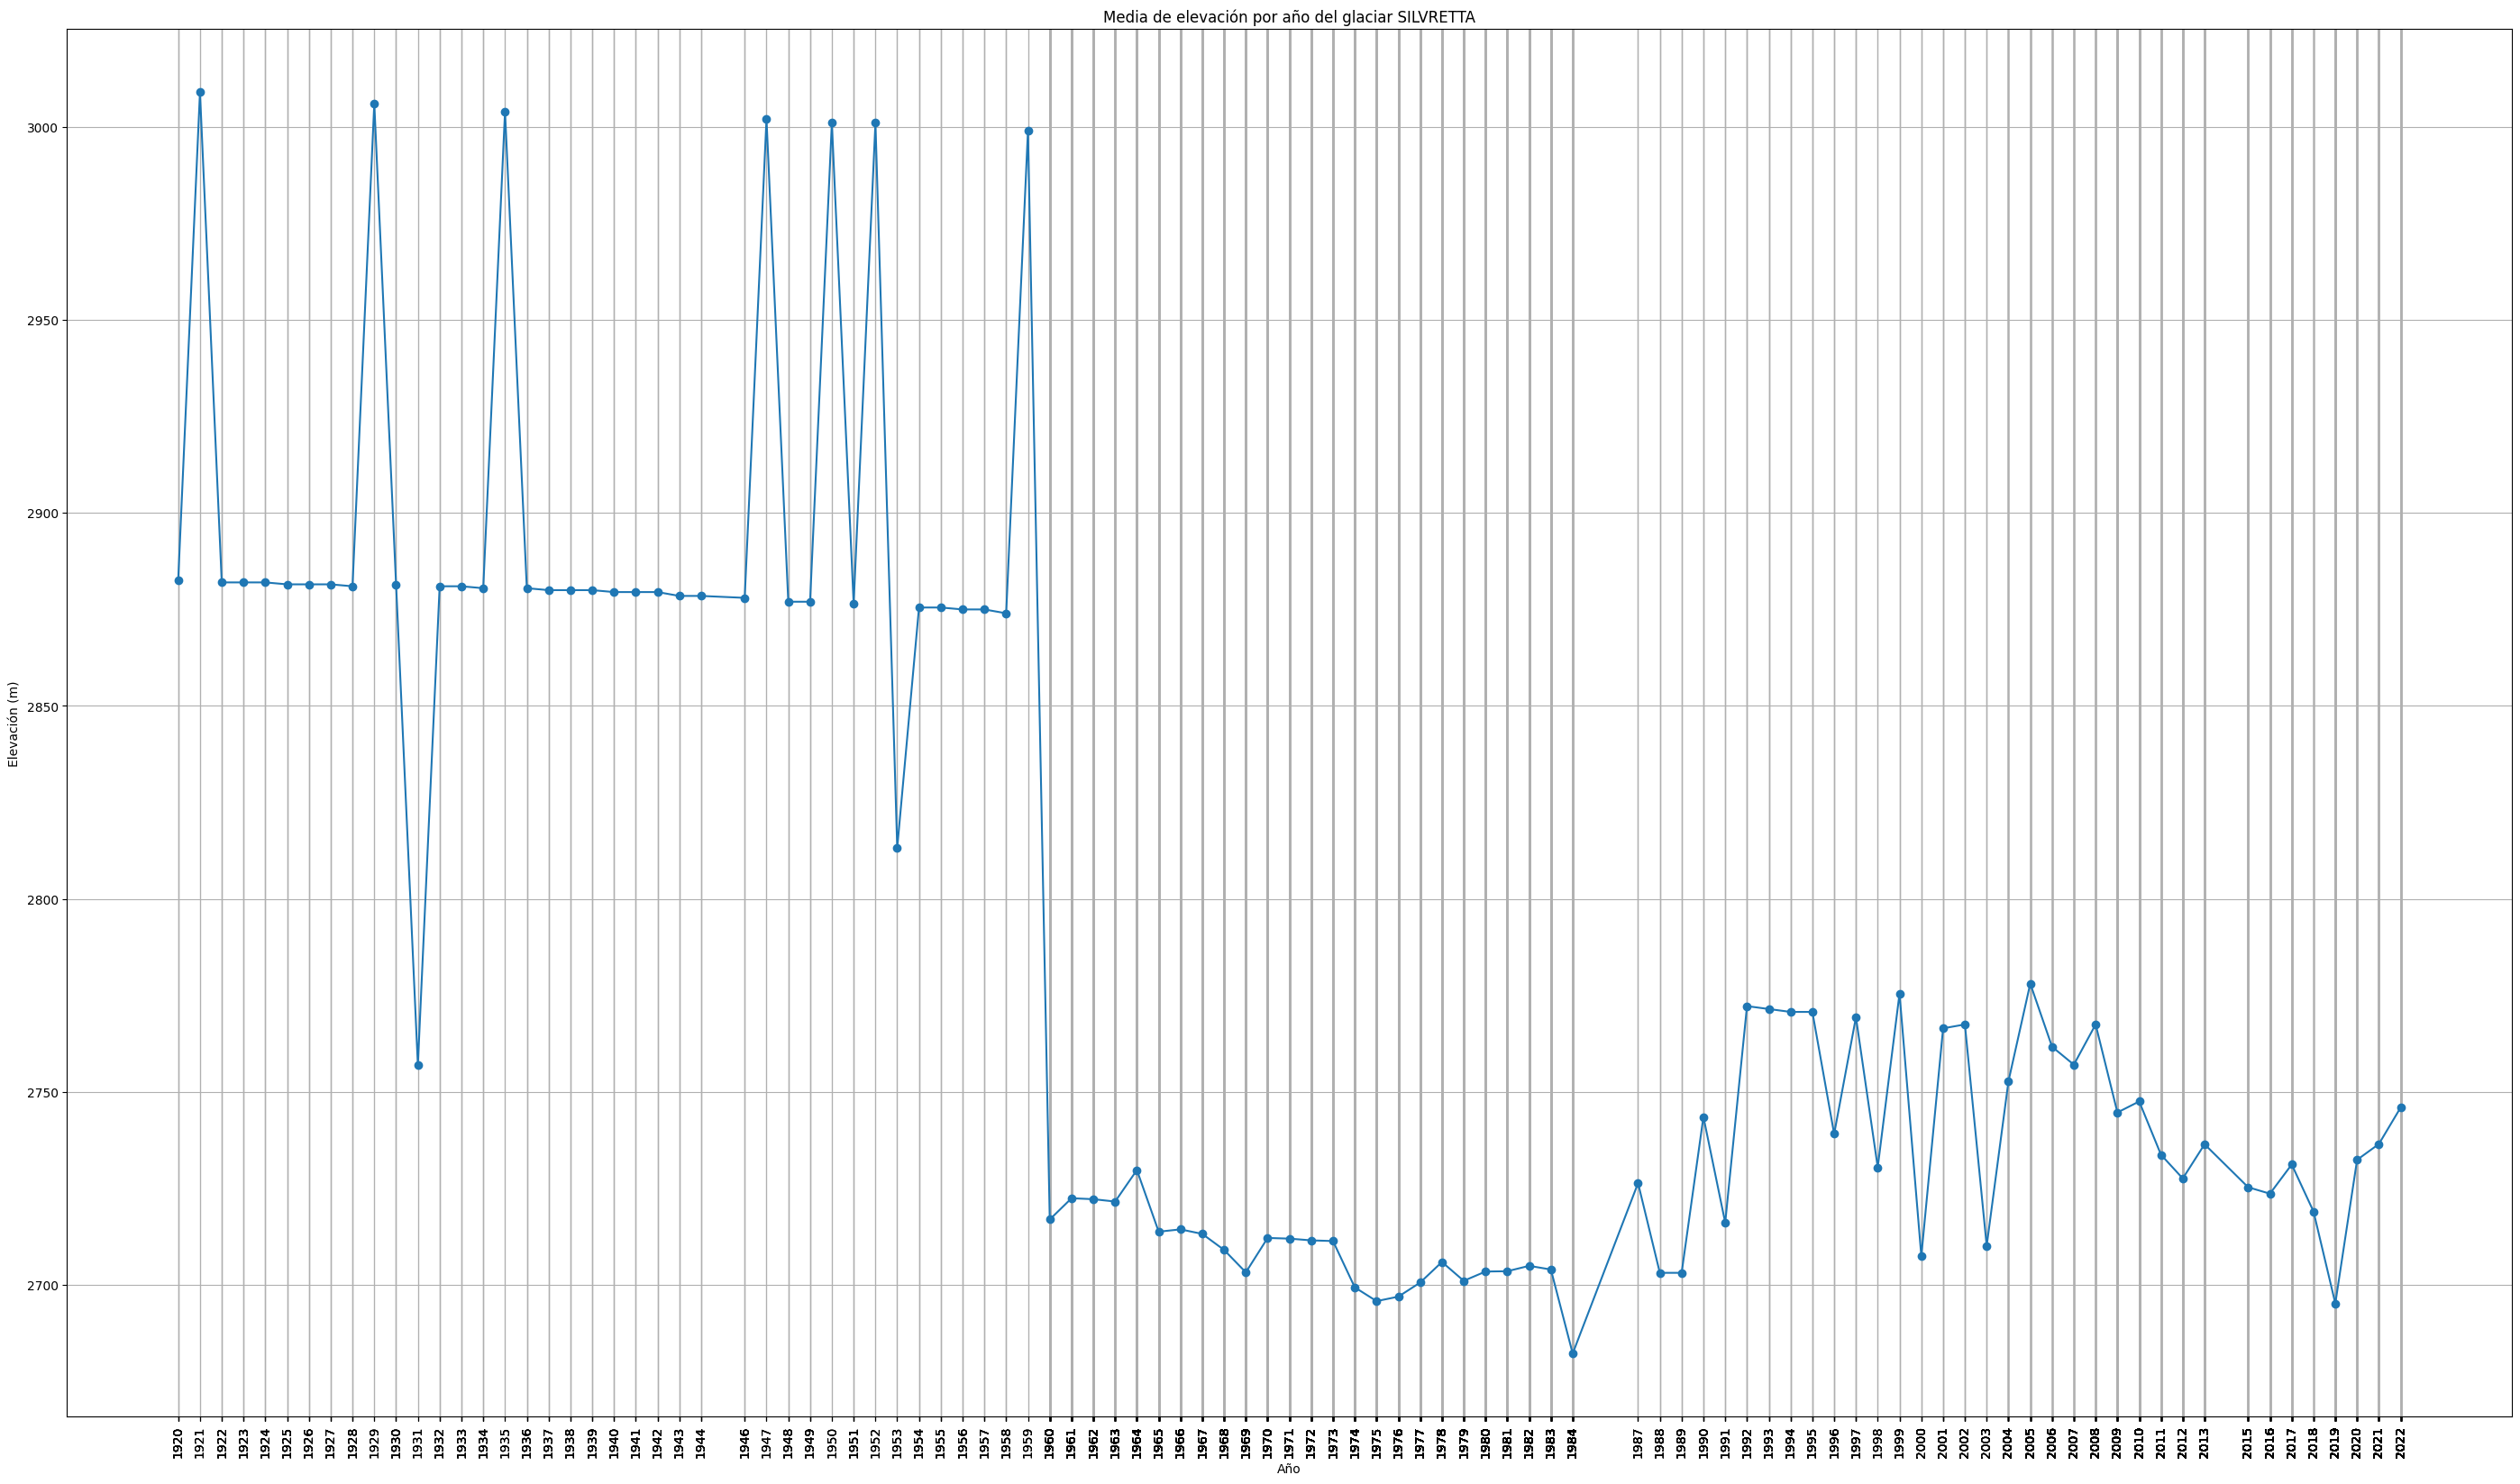

In [ ]:
#hacemos una gráfica
plt.figure(figsize = (35,20))
plt.plot(mean_by_year, marker = 'o', linestyle='-')
plt.title('Media de elevación por año del glaciar SILVRETTA')
plt.xlabel('Año')
plt.ylabel('Elevación (m)')
plt.grid(True)
plt.xticks(graphic_mass_b_point_df['YEAR'], rotation=90)
plt.show()

#comentario: tarda y se ve fatal hay que hacer zoom

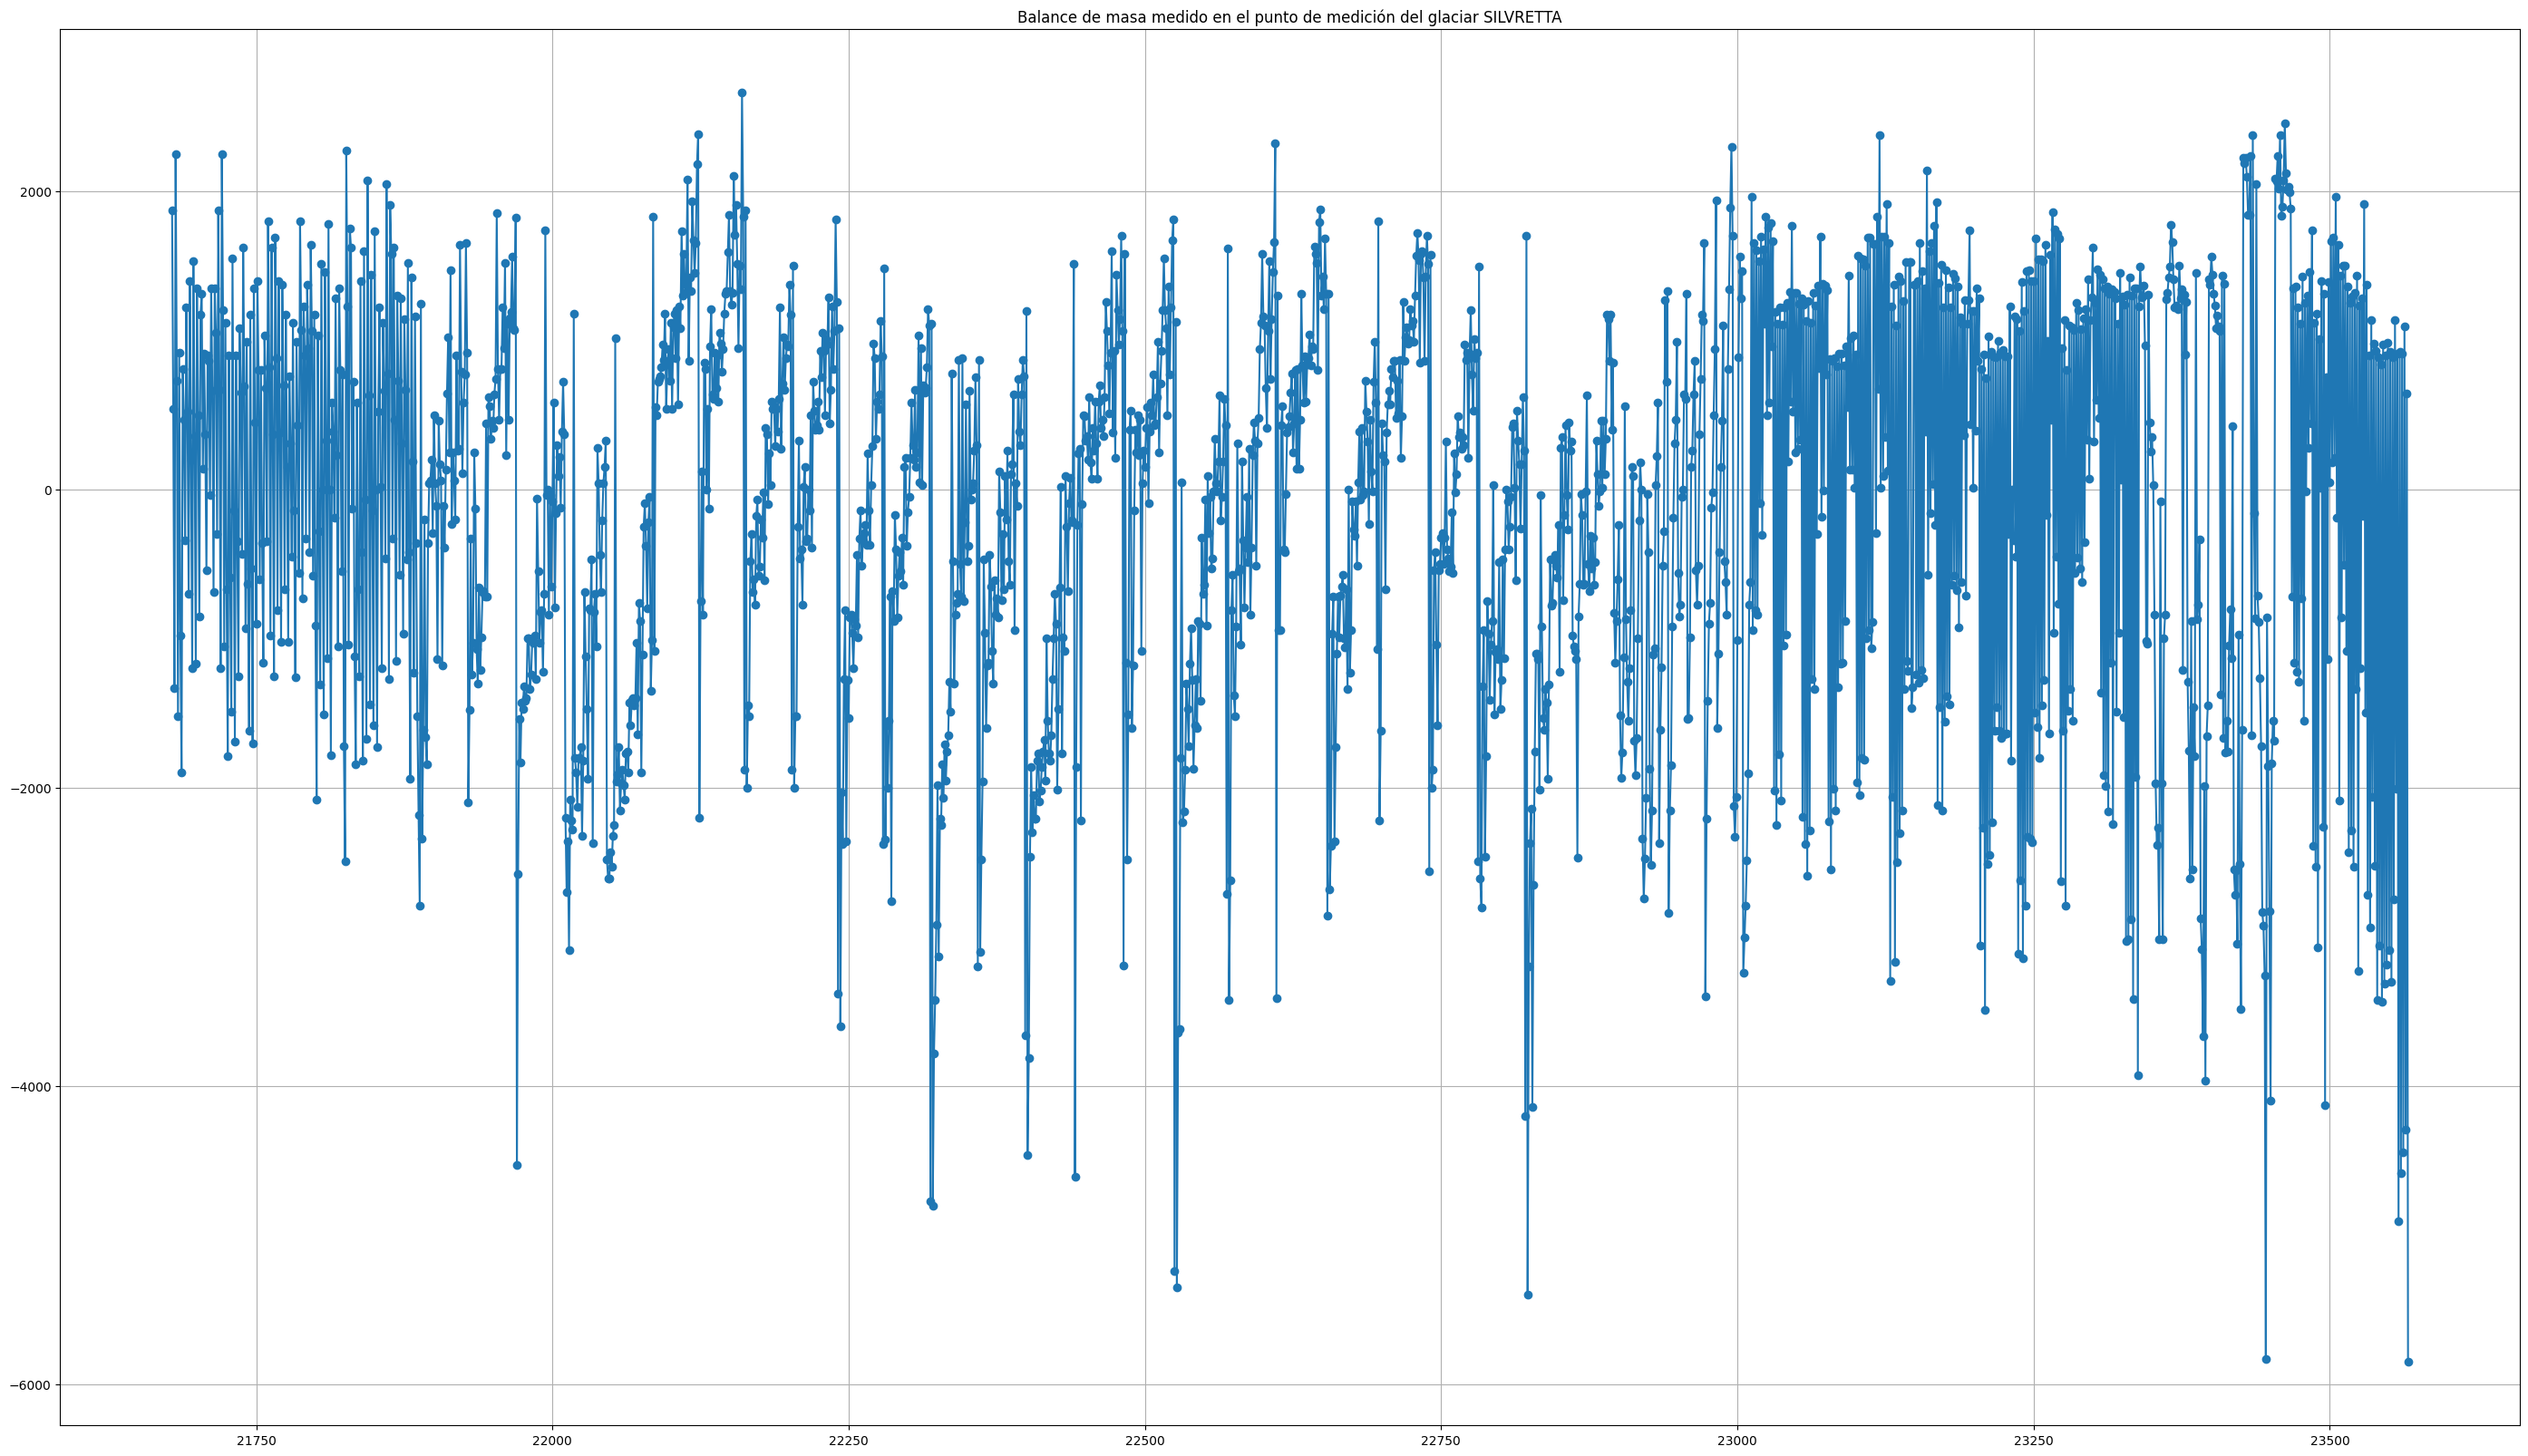

In [ ]:
plt.figure(figsize = (35,20))
plt.plot(graphic_mass_b_point_df['POINT_BALANCE'], marker = 'o')
plt.title('Balance de masa medido en el punto de medición del glaciar SILVRETTA')
plt.grid(True)
plt.show()
# wow

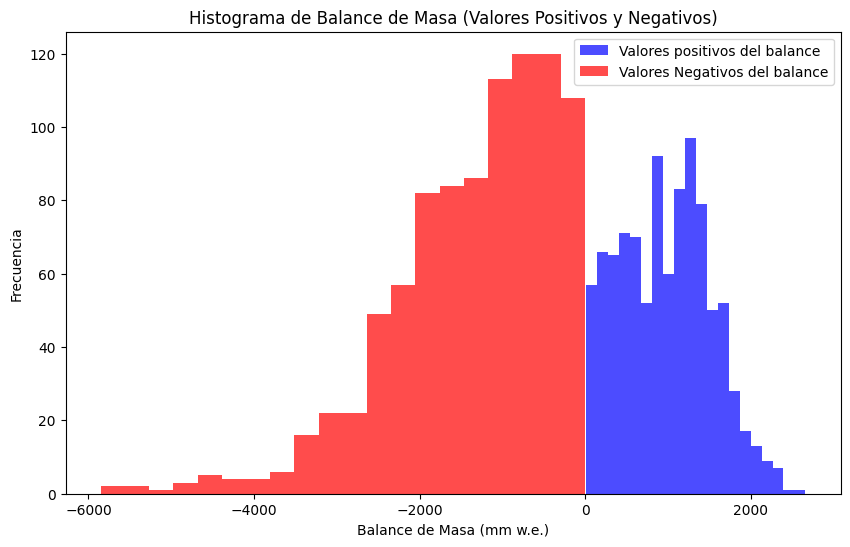

In [ ]:
# Filtrar los datos para obtener valores positivos y negativos de POINT_BALANCE
positive_values = graphic_mass_b_point_df[graphic_mass_b_point_df['POINT_BALANCE']>0]['POINT_BALANCE']
negative_values = graphic_mass_b_point_df[graphic_mass_b_point_df['POINT_BALANCE']<0]['POINT_BALANCE']

# Hacemos la gráfica
plt.figure(figsize=(10,6))
plt.hist(positive_values,color='blue', alpha=0.7, bins=20, label='Valores positivos del balance')
plt.hist(negative_values, color='red', alpha=0.7, bins=20, label='Valores Negativos del balance')

plt.xlabel('Balance de Masa (mm w.e.)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Balance de Masa (Valores Positivos y Negativos)')
plt.legend()

plt.show()

In [ ]:
# Vemos que hay más valores negativos que positivos. :(

###🧊DATASET 7 **front_variation.csv**:
- dataset resultante : **clean_front_variation_df**


In [ ]:
# Vamos al siguiente dataset:
front_variation_df = pd.read_csv('/content/drive/MyDrive/DATASETS/front_variation.csv')
front_variation_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,SURVEY_DATE,REFERENCE_DATE,FRONT_VARIATION,FRONT_VAR_UNC,QUALITATIVE_VARIATION,SURVEY_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AQ,ADAMS,885,1989,19899999,19889999.0,-2.1,NaN,NaN,cC,NaN,NaN,NaN,NaN
1,AQ,ADAMS,885,1990,19909999,19899999.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AQ,BAHIA DEL DIABLO,2665,2000,20009999,19999999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
3,AQ,BAHIA DEL DIABLO,2665,2001,20019999,20009999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
4,AQ,BAHIA DEL DIABLO,2665,2002,20029999,20019999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
5,AQ,BAHIA DEL DIABLO,2665,2003,20039999,20029999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Hernán De Angelis, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
6,AQ,BAHIA DEL DIABLO,2665,2004,20049999,20039999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
7,AQ,BAHIA DEL DIABLO,2665,2005,20059999,20049999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
8,AQ,BAHIA DEL DIABLO,2665,2006,20069999,20059999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...
9,AQ,BAHIA DEL DIABLO,2665,2007,20079999,20069999.0,NaN,NaN,ST,xX,"Pedro Skvarca, Evgeniy Ermolin","División Glaciología, Instituto Antártico Arge...",NaN,Survey Method: Combination of Geodetic ground ...


In [ ]:
front_variation_df.isna().sum()

POLITICAL_UNIT                0
NAME                          0
WGMS_ID                       0
YEAR                          0
SURVEY_DATE                   0
REFERENCE_DATE              768
FRONT_VARIATION            3791
FRONT_VAR_UNC             40773
QUALITATIVE_VARIATION     43149
SURVEY_PLATFORM_METHOD    31622
INVESTIGATOR              28375
SPONS_AGENCY              34024
REFERENCE                 23157
REMARKS                   40614
dtype: int64

In [ ]:
# nos quedaremos con las siguientes columnas:
fv_columns = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR', 'FRONT_VARIATION',
       'QUALITATIVE_VARIATION']
clean_front_variation_df = pd.DataFrame()
for column in fv_columns:
    clean_front_variation_df [column] = front_variation_df[column]

clean_front_variation_df .head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION
0,AQ,ADAMS,885,1989,-2.1,NaN
1,AQ,ADAMS,885,1990,0.0,NaN
2,AQ,BAHIA DEL DIABLO,2665,2000,NaN,ST
3,AQ,BAHIA DEL DIABLO,2665,2001,NaN,ST
4,AQ,BAHIA DEL DIABLO,2665,2002,NaN,ST
5,AQ,BAHIA DEL DIABLO,2665,2003,NaN,ST
6,AQ,BAHIA DEL DIABLO,2665,2004,NaN,ST
7,AQ,BAHIA DEL DIABLO,2665,2005,NaN,ST
8,AQ,BAHIA DEL DIABLO,2665,2006,NaN,ST
9,AQ,BAHIA DEL DIABLO,2665,2007,NaN,ST


In [ ]:
clean_front_variation_df.describe()

,WGMS_ID,YEAR,FRONT_VARIATION
count,47087.000000,47087.000000,43296.000000
mean,1370.812815,1971.504959,-45.858502
std,3315.182603,33.111879,361.842636
min,0.000000,1705.000000,-17854.000000
25%,447.000000,1949.000000,-24.000000
50%,620.000000,1976.000000,-9.000000
75%,1512.000000,1998.000000,-1.500000
max,216746.000000,2023.000000,11900.000000


In [ ]:
# Según la documentación, vamos a aplicar que si el contenido de 'FRON_VARIATION' es NaN, pero el de QUALITATIVE_VARIATION es ST (estable), front variation será 0.
clean_front_variation_df.loc[(clean_front_variation_df['FRONT_VARIATION'].isna()) & (clean_front_variation_df ['QUALITATIVE_VARIATION']=='ST'),'FRONT_VARIATION'] = 0.0
clean_front_variation_df.loc[(clean_front_variation_df['FRONT_VARIATION']>0) & (clean_front_variation_df ['QUALITATIVE_VARIATION'].isna()),'QUALITATIVE_VARIATION'] = '+X'
clean_front_variation_df.loc[(clean_front_variation_df['FRONT_VARIATION']<0) & (clean_front_variation_df ['QUALITATIVE_VARIATION'].isna()),'QUALITATIVE_VARIATION'] = '-X'
clean_front_variation_df.loc[(clean_front_variation_df['FRONT_VARIATION']==0) & (clean_front_variation_df ['QUALITATIVE_VARIATION'].isna()),'QUALITATIVE_VARIATION'] = 'ST'
clean_front_variation_df.head(25)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION
0,AQ,ADAMS,885,1989,-2.1,-X
1,AQ,ADAMS,885,1990,0.0,ST
2,AQ,BAHIA DEL DIABLO,2665,2000,0.0,ST
3,AQ,BAHIA DEL DIABLO,2665,2001,0.0,ST
4,AQ,BAHIA DEL DIABLO,2665,2002,0.0,ST
5,AQ,BAHIA DEL DIABLO,2665,2003,0.0,ST
6,AQ,BAHIA DEL DIABLO,2665,2004,0.0,ST
7,AQ,BAHIA DEL DIABLO,2665,2005,0.0,ST
8,AQ,BAHIA DEL DIABLO,2665,2006,0.0,ST
9,AQ,BAHIA DEL DIABLO,2665,2007,0.0,ST


In [ ]:
clean_front_variation_df  = clean_front_variation_df [clean_front_variation_df ['FRONT_VARIATION'].notnull()]

In [ ]:
clean_front_variation_df ['NAME'].value_counts()

NAME
OE. WURTEN K.     171
GOLDBERG K.       171
KLEINFLEISS K.    170
PASTERZE          145
RHONE             141
                 ... 
NO 43               1
NO 44               1
NO 45               1
NO 46               1
NO 202              1
Name: count, Length: 2488, dtype: int64

In [ ]:
graphic_front_variation_df = clean_front_variation_df [clean_front_variation_df ['NAME'] == 'GOLDBERG K.']
graphic_front_variation_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION
2349,AT,GOLDBERG K.,1305,1850,0.0,ST
2350,AT,GOLDBERG K.,1305,1851,0.0,ST
2351,AT,GOLDBERG K.,1305,1852,0.0,ST
2352,AT,GOLDBERG K.,1305,1853,0.0,ST
2353,AT,GOLDBERG K.,1305,1854,0.0,ST
2354,AT,GOLDBERG K.,1305,1855,0.0,ST
2355,AT,GOLDBERG K.,1305,1856,0.0,ST
2356,AT,GOLDBERG K.,1305,1857,0.0,ST
2357,AT,GOLDBERG K.,1305,1858,0.0,ST
2358,AT,GOLDBERG K.,1305,1859,0.0,ST


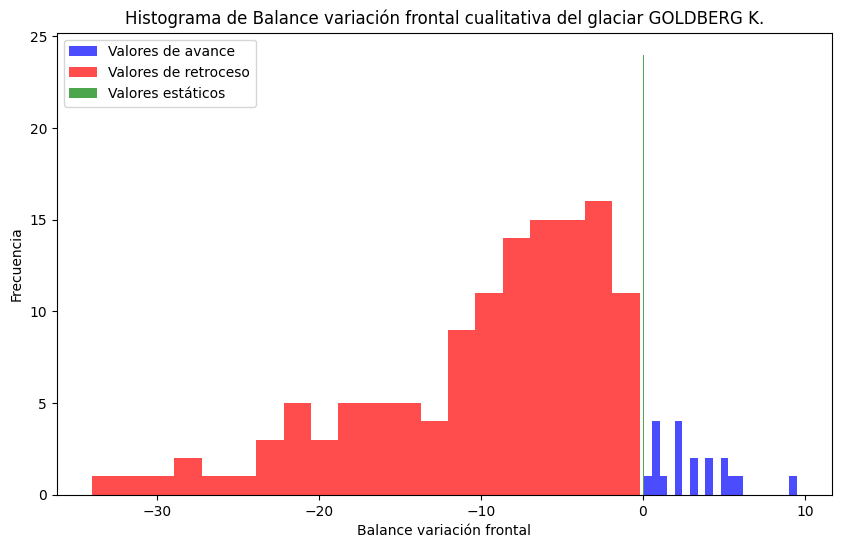

In [ ]:
# vamos a hacer una gráfica con el glaciar GOLDBERG K. para ver la cantidad de veces que ha retrocedido, avanzado o se ha quedado estable.
# Filtrar los datos para obtener valores positivos y negativos de POINT_BALANCE
valores_pos = graphic_front_variation_df [graphic_front_variation_df ['FRONT_VARIATION']>0]['FRONT_VARIATION']
valores_neg = graphic_front_variation_df [graphic_front_variation_df ['FRONT_VARIATION']<0]['FRONT_VARIATION']
valores_est = graphic_front_variation_df[graphic_front_variation_df ['FRONT_VARIATION']== 0.0]['FRONT_VARIATION']
# Hacemos la gráfica
plt.figure(figsize=(10,6))
plt.hist(valores_pos,color='blue', alpha=0.7, bins=20, label='Valores de avance')
plt.hist(valores_neg, color='red', alpha=0.7, bins=20, label='Valores de retroceso')
plt.hist(valores_est, color='green', alpha=0.7, bins=20, label='Valores estáticos')
plt.xlabel('Balance variación frontal')
plt.ylabel('Frecuencia')
plt.title('Histograma de Balance variación frontal cualitativa del glaciar GOLDBERG K.')
plt.legend()

plt.show()

In [ ]:
# El siguiente dataset lo uniremos con este último ya que están claramente interconectados.

###🧊DATASET 8 **reconstruction_front_variation.csv**:
dataset resultante : **clean_rec_front_variation_df**


In [ ]:
rec_front_variation_df = pd.read_csv('/content/drive/MyDrive/DATASETS/reconstruction_front_variation.csv')
rec_front_variation_df.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,REC_SERIES_ID,YEAR,YEAR_UNC,REFERENCE_YEAR,REF_YEAR_UNC,FRONT_VARIATION,QUALITATIVE_VARIATION,FRONT_VAR_POS_UNC,FRONT_VAR_NEG_UNC,LOWEST_ELEVATION,HIGHEST_ELEVATION,ELEVATION_UNC,MORAINE_DEFINED_MAX,METHOD_CODE,METHOD_REMARKS,REMARKS
0,AR,AMEGHINO,3800,9,1765,100.0,NaN,NaN,NaN,+X,NaN,NaN,NaN,NaN,NaN,MPE,RAD,Radiocarbon dating of in situ stumps buried by...,YEAR: Estimated date of formation of frontal m...
1,AR,AMEGHINO,3800,9,1947,0.0,1765.0,100.0,-170.0,NaN,15.0,50.0,NaN,NaN,NaN,NaN,PHO,Glacier front position identified in 1947 air ...,NaN
2,AR,AMEGHINO,3800,9,1970,0.0,1947.0,0.0,-160.0,NaN,15.0,15.0,NaN,NaN,NaN,NaN,PHO,Glacier front position identified in 1970 air ...,NaN
3,AR,AMEGHINO,3800,9,1986,0.0,1970.0,0.0,-3600.0,NaN,15.0,15.0,NaN,NaN,NaN,NaN,OTH,Glacier front position identified in 1986 Land...,NaN
4,AR,AMEGHINO,3800,9,2000,0.0,1986.0,0.0,-500.0,NaN,15.0,15.0,NaN,NaN,NaN,NaN,OTH,Glacier front position identified in 2000 Land...,NaN
5,AR,AMEGHINO,3800,9,2005,0.0,2000.0,0.0,-390.0,NaN,15.0,15.0,NaN,NaN,NaN,NaN,OTH,Glacier front position identified in 2005 ASTE...,NaN
6,AR,ESPERANZA NORTE,3711,10,1691,NaN,1652.0,NaN,-130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,NaN,NaN
7,AR,ESPERANZA NORTE,3711,10,1792,NaN,1691.0,NaN,-210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,NaN,NaN
8,AR,ESPERANZA NORTE,3711,10,1795,NaN,1792.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,NaN,NaN
9,AR,ESPERANZA NORTE,3711,10,1807,NaN,1795.0,NaN,-120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEN,NaN,NaN


In [ ]:
# Nos quedamos con las columnas que nos sirven:
rec_fv_columns = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR','rec_FRONT_VARIATION', 'rec_QUALITATIVE_VARIATION','LOWEST_ELEVATION', 'HIGHEST_ELEVATION']

clean_rec_front_variation_df = pd.DataFrame()
for col in rec_fv_columns:
  clean_rec_front_variation_df[col] = rec_front_variation_df[col.replace('rec_','')]

clean_rec_front_variation_df.head(20)


,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION,HIGHEST_ELEVATION
0,AR,AMEGHINO,3800,1765,NaN,+X,NaN,NaN
1,AR,AMEGHINO,3800,1947,-170.0,NaN,NaN,NaN
2,AR,AMEGHINO,3800,1970,-160.0,NaN,NaN,NaN
3,AR,AMEGHINO,3800,1986,-3600.0,NaN,NaN,NaN
4,AR,AMEGHINO,3800,2000,-500.0,NaN,NaN,NaN
5,AR,AMEGHINO,3800,2005,-390.0,NaN,NaN,NaN
6,AR,ESPERANZA NORTE,3711,1691,-130.0,NaN,NaN,NaN
7,AR,ESPERANZA NORTE,3711,1792,-210.0,NaN,NaN,NaN
8,AR,ESPERANZA NORTE,3711,1795,100.0,NaN,NaN,NaN
9,AR,ESPERANZA NORTE,3711,1807,-120.0,NaN,NaN,NaN


In [ ]:
# Rellenaremos los huecos igual que el anterior:
clean_rec_front_variation_df.loc[(clean_rec_front_variation_df['rec_FRONT_VARIATION']<0) & (clean_rec_front_variation_df['rec_QUALITATIVE_VARIATION'].isna()),'rec_QUALITATIVE_VARIATION'] = '-X'
clean_rec_front_variation_df.loc[(clean_rec_front_variation_df['rec_FRONT_VARIATION']>0) & (clean_rec_front_variation_df['rec_QUALITATIVE_VARIATION'].isna()),'rec_QUALITATIVE_VARIATION'] = '+X'
clean_rec_front_variation_df.loc[(clean_rec_front_variation_df['rec_FRONT_VARIATION']==0) & (clean_rec_front_variation_df['rec_QUALITATIVE_VARIATION'].isna()),'rec_QUALITATIVE_VARIATION'] = 'ST'
clean_rec_front_variation_df.loc[(clean_rec_front_variation_df['rec_FRONT_VARIATION'].isna()) & (clean_rec_front_variation_df['rec_QUALITATIVE_VARIATION']=='ST'),'rec_FRONT_VARIATION'] = 0.0

clean_rec_front_variation_df.head(25)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION,HIGHEST_ELEVATION
0,AR,AMEGHINO,3800,1765,NaN,+X,NaN,NaN
1,AR,AMEGHINO,3800,1947,-170.0,-X,NaN,NaN
2,AR,AMEGHINO,3800,1970,-160.0,-X,NaN,NaN
3,AR,AMEGHINO,3800,1986,-3600.0,-X,NaN,NaN
4,AR,AMEGHINO,3800,2000,-500.0,-X,NaN,NaN
5,AR,AMEGHINO,3800,2005,-390.0,-X,NaN,NaN
6,AR,ESPERANZA NORTE,3711,1691,-130.0,-X,NaN,NaN
7,AR,ESPERANZA NORTE,3711,1792,-210.0,-X,NaN,NaN
8,AR,ESPERANZA NORTE,3711,1795,100.0,+X,NaN,NaN
9,AR,ESPERANZA NORTE,3711,1807,-120.0,-X,NaN,NaN


In [ ]:
clean_rec_front_variation_df['LOWEST_ELEVATION'].notna().sum()

1

In [ ]:
clean_rec_front_variation_df['HIGHEST_ELEVATION'].notna().sum()

1

In [ ]:
# Literal esto no ha servido de nada en fin

### 💥💥 MERGEAMOS🧊🧊 DATASET 7 Y 8  
- front_variation + reconstruction_front_variation.csv
- dataset resultante: clean_special_event_df: **front_variation_merged**

In [ ]:
# mergeamos los dos datasets en base al campo nombre y el campo año.
front_variation_merged = pd.merge(clean_front_variation_df, clean_rec_front_variation_df, on=['NAME', 'YEAR', 'POLITICAL_UNIT','WGMS_ID'], suffixes=('_fv', '_rec_fv'))
front_variation_merged.head(25)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION,HIGHEST_ELEVATION
0,AT,OEDENWINKEL K.,559,1969,-9.000000,-X,-457.0,-X,NaN,NaN
1,AT,OEDENWINKEL K.,559,1977,-17.299999,-X,-53.0,-X,NaN,NaN
2,AT,OEDENWINKEL K.,559,1985,-12.400000,-X,-195.0,-X,NaN,NaN
3,AT,OEDENWINKEL K.,559,1988,-3.000000,-X,-18.0,-X,NaN,NaN
4,AT,OEDENWINKEL K.,559,1992,-1.400000,-X,-11.0,-X,NaN,NaN
5,AT,OEDENWINKEL K.,559,1998,-4.300000,-X,-7.0,-X,NaN,NaN
6,AT,OEDENWINKEL K.,559,2008,-6.600000,-X,-61.0,-X,NaN,NaN
7,AT,OEDENWINKEL K.,559,2013,-7.000000,-X,0.0,ST,NaN,NaN
8,BO,ZONGO,26615,1992,-12.300000,-X,-12.0,-X,NaN,NaN
9,BO,ZONGO,26615,1993,1.100000,+X,1.0,+X,NaN,NaN


In [ ]:
#esto siguiente es para añadirle el prefijo al año
#fv_merged['fv_YEAR'] = fv_merged['YEAR']

In [ ]:
front_variation_merged.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION,HIGHEST_ELEVATION
0,AT,OEDENWINKEL K.,559,1969,-9.000000,-X,-457.0,-X,NaN,NaN
1,AT,OEDENWINKEL K.,559,1977,-17.299999,-X,-53.0,-X,NaN,NaN
2,AT,OEDENWINKEL K.,559,1985,-12.400000,-X,-195.0,-X,NaN,NaN
3,AT,OEDENWINKEL K.,559,1988,-3.000000,-X,-18.0,-X,NaN,NaN
4,AT,OEDENWINKEL K.,559,1992,-1.400000,-X,-11.0,-X,NaN,NaN
5,AT,OEDENWINKEL K.,559,1998,-4.300000,-X,-7.0,-X,NaN,NaN
6,AT,OEDENWINKEL K.,559,2008,-6.600000,-X,-61.0,-X,NaN,NaN
7,AT,OEDENWINKEL K.,559,2013,-7.000000,-X,0.0,ST,NaN,NaN
8,BO,ZONGO,26615,1992,-12.300000,-X,-12.0,-X,NaN,NaN
9,BO,ZONGO,26615,1993,1.100000,+X,1.0,+X,NaN,NaN


In [ ]:
front_variation_merged.drop(columns='YEAR')

,POLITICAL_UNIT,NAME,WGMS_ID,FRONT_VARIATION,QUALITATIVE_VARIATION,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION,HIGHEST_ELEVATION
0,AT,OEDENWINKEL K.,559,-9.000000,-X,-457.0,-X,NaN,NaN
1,AT,OEDENWINKEL K.,559,-17.299999,-X,-53.0,-X,NaN,NaN
2,AT,OEDENWINKEL K.,559,-12.400000,-X,-195.0,-X,NaN,NaN
3,AT,OEDENWINKEL K.,559,-3.000000,-X,-18.0,-X,NaN,NaN
4,AT,OEDENWINKEL K.,559,-1.400000,-X,-11.0,-X,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1081,NO,NIGARDSBREEN,290,-1.000000,-X,-1.0,-X,NaN,NaN
1082,NO,NIGARDSBREEN,290,-24.000000,-X,-24.0,-X,NaN,NaN
1083,NZ,FRANZ JOSEF / KA ROIMATA O HINE HUKATERE,899,-130.000000,-X,-351.0,-X,NaN,NaN
1084,SJ,ALDEGONDABREEN,3470,-400.000000,-X,-800.0,-X,NaN,NaN


###🧊DATASET 9 **special_event.csv**:
- dataset resultante: **clean_special_event_df**


In [ ]:
# Último csv:
special_event_df = pd.read_csv('/content/drive/MyDrive/DATASETS/special_event.csv')
special_event_df.head(25)

,POLITICAL_UNIT,NAME,WGMS_ID,EVENT_ID,EVENT_DATE,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER,EVENT_DESCRIPTION,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS
0,AF,UNNAMED 25830,26359,3443,20180712.0,False,False,True,False,False,False,"On July 12, 2018 a GLOF took place in Peshghar...",Sudan Bikash Maharjan; UNITAR; USAID,International Centre for Integrated Mountain D...,Maharjan (2018): Peshghor Flood in Khenj Distr...,NaN
1,AQ,NO 38,4037,344,19909999.0,True,False,False,False,False,False,The Oktyabr'sky glacier surged for an estimate...,NaN,NaN,Kotlakov (2008),1985-1990
2,AR,ALTO DEL PLOMO,922,133,19841114.0,True,False,True,False,False,False,"On 14 November 1984, Rio del Plomo was dammed ...",NaN,NaN,"Espizua, L. E., Bengochea, J. D. (1990): Surge...",NaN
3,AR,AZUFRE,2851,3428,20181214.0,False,False,False,False,True,False,Between 14/12/2018 and 15/01/2018 eruptive act...,"Pierre Pitte, Laura Zalazar",IANIGLA-CONICET,NaN,NaN
4,AR,CERRO MARMOLEJO EAST GLACIER,8171,594,NaN,True,False,False,False,False,False,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN
5,AR,COLINA (COLINO),8170,593,19379999.0,True,False,False,False,False,False,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN
6,AR,EAST OF CERRO POLLERAS,8169,592,NaN,True,False,False,False,False,False,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",NaN
7,AR,FRIAS,1347,3444,19429999.0,False,False,True,False,False,False,"Between 1942 and Between 1942 and 1953, a GLOF...",Jonathan L. Carrivick and Fiona S. Tweed,"School of Geography, University of Leeds, Wood...","Carrivick, J. L. and Tweed, F. S. (2016). A gl...",NaN
8,AR,GLACIER B,8173,1152,19869999.0,True,False,False,False,False,False,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",surge onset: 1985
9,AR,GRANDE DEL JUNCAL GLACIER JUNCAL I,8166,588,19559999.0,True,False,False,False,False,False,Event description from Sevestre & Benn (2015):...,NaN,NaN,"Event description, Surge Diagnostic features a...",surge onset: 1934


In [ ]:
# Nos quedaremos solo con las columnas necesarias, y como en este csv no hay columna 'YEAR' aplicaremos la función 'solo_año' para tener una referencia igual en todas.

se_columns = ['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'YEAR',
       'ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_AVALANCHE', 'ET_TECTONIC',
       'ET_OTHER']

clean_special_event_df = pd.DataFrame()

for column in se_columns:
  if column == 'YEAR':
    clean_special_event_df[column] = special_event_df['EVENT_DATE']
  else:
    clean_special_event_df[column] = special_event_df[column]

clean_special_event_df['YEAR'] = clean_special_event_df['YEAR'].apply(only_year)
clean_special_event_df.head(15)


,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER
0,AF,UNNAMED 25830,26359,2018,False,False,True,False,False,False
1,AQ,NO 38,4037,1990,True,False,False,False,False,False
2,AR,ALTO DEL PLOMO,922,1984,True,False,True,False,False,False
3,AR,AZUFRE,2851,2018,False,False,False,False,True,False
4,AR,CERRO MARMOLEJO EAST GLACIER,8171,nan,True,False,False,False,False,False
5,AR,COLINA (COLINO),8170,1937,True,False,False,False,False,False
6,AR,EAST OF CERRO POLLERAS,8169,nan,True,False,False,False,False,False
7,AR,FRIAS,1347,1942,False,False,True,False,False,False
8,AR,GLACIER B,8173,1986,True,False,False,False,False,False
9,AR,GRANDE DEL JUNCAL GLACIER JUNCAL I,8166,1955,True,False,False,False,False,False


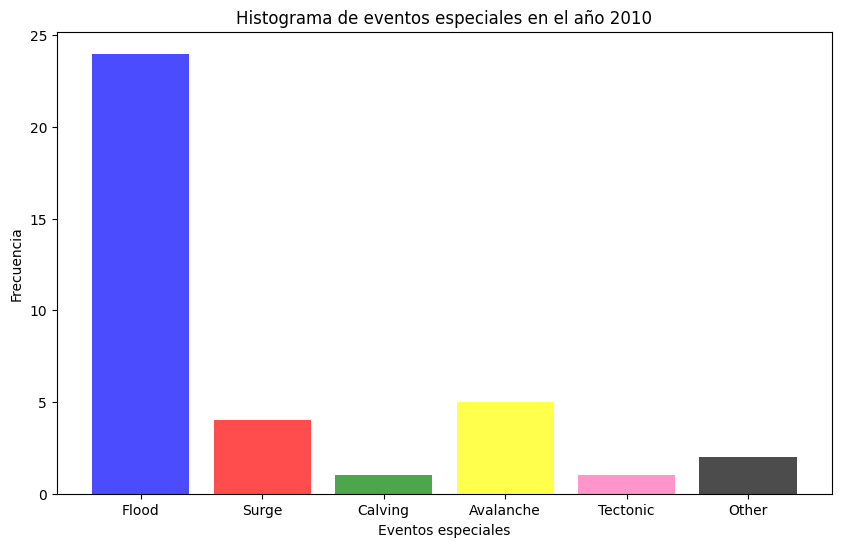

In [ ]:
# Filtra las filas correspondientes al año 2010
clean_special_event_df_2010 = clean_special_event_df[clean_special_event_df['YEAR'] == '2010']

# Contar el número de ocurrencias de cada tipo de evento en el año 2018
flood_count = clean_special_event_df_2010['ET_FLOOD'].sum()
surge_count = clean_special_event_df_2010['ET_SURGE'].sum()
calving_count = clean_special_event_df_2010['ET_CALVING'].sum()
avalanche_count = clean_special_event_df_2010['ET_AVALANCHE'].sum()
tectonic_count = clean_special_event_df_2010['ET_TECTONIC'].sum()
other_count = clean_special_event_df_2010['ET_OTHER'].sum()

# Crear el histograma
plt.figure(figsize=(10,6))
plt.bar(['Flood', 'Surge', 'Calving', 'Avalanche', 'Tectonic', 'Other'],
        [flood_count, surge_count, calving_count, avalanche_count, tectonic_count, other_count],
        color=['blue', 'red', 'green', 'yellow', 'hotpink', 'black'], alpha=0.7)
plt.xlabel('Eventos especiales')
plt.ylabel('Frecuencia')
plt.title('Histograma de eventos especiales en el año 2010')
plt.show()


### VAMOS A MIRAR QUE TENEMOS 👀

In [ ]:
relevant_glaciers = clean_glacier_df[(clean_glacier_df['GLACIER_REGION_CODE'] == 'ASW') | (clean_glacier_df['GLACIER_REGION_CODE'] == 'GRL')]
relevant_glaciers

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01
1329,AF,RGI60-14.00147,106255,36.951500,74.149700,ASW,ASW-02
1330,AF,RGI60-14.00330,106422,37.062600,74.507700,ASW,ASW-02
1331,AF,RGI60-14.00341,106432,37.037600,74.563200,ASW,ASW-02
1332,AF,RGI60-14.00345,106436,37.057000,74.428500,ASW,ASW-02
...,...,...,...,...,...,...,...
189468,TJ,RGI60-14.19022,120475,37.293971,74.968678,ASW,ASW-02
189469,TJ,RGI60-14.19025,120478,37.294251,74.999573,ASW,ASW-02
189470,TJ,RGI60-14.19026,120479,37.294802,74.992439,ASW,ASW-02
189471,TJ,RGI60-14.19027,120480,37.309605,75.004683,ASW,ASW-02


In [ ]:
clean_state_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA
0,AF,PIR YAKH,10452,2018,5070.0,4735.0,4400.0,2099.9999,1679.9999
1,AQ,ADAMS,885,1989,NaN,NaN,NaN,10000.0000,5730.0000
2,AQ,ADAMS,885,1990,1200.0,785.0,370.0,NaN,NaN
3,AQ,ALBERICH,1062,1975,1800.0,1560.0,1400.0,1300.0000,1360.0000
4,AQ,ASTROLABE,3354,1947,NaN,NaN,NaN,NaN,83500.0000


In [ ]:
clean_change_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA_CHANGE,THICKNESS_CHG,VOLUME_CHANGE
0,AF,RGI60-13.10763,156232,2004,NaN,-1535.0,-1550.0
1,AF,RGI60-13.10763,156232,2019,NaN,-4420.0,-4460.0
2,AF,RGI60-13.10763,156232,2009,NaN,-1265.0,-1275.0
3,AF,RGI60-13.10763,156232,2014,NaN,-915.0,-920.0
4,AF,RGI60-13.10763,156232,2019,NaN,-715.0,-720.0


In [ ]:
clean_mass_merged_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,AREA,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
0,AQ,ALBERICH,1062,1972,1360.0,0.0,10.0,20.0,NaN,NaN,NaN,67.0
1,AQ,ALBERICH,1062,1973,1360.0,0.0,30.0,30.0,NaN,NaN,NaN,75.0
2,AQ,ALBERICH,1062,1974,1360.0,-10.0,0.0,-20.0,NaN,NaN,NaN,35.0
3,AQ,ALBERICH,1062,1975,1360.0,10.0,0.0,10.0,NaN,NaN,NaN,60.0
4,AQ,ANVERS I ICE CAP,3954,1966,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN


In [ ]:
clean_mass_b_point_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,POINT_ELEVATION,POINT_BALANCE
0,AF,PIR YAKH,10452,2018,4541.0,-3413.0
1,AF,PIR YAKH,10452,2018,4737.0,-1684.0
2,AQ,BAHIA DEL DIABLO,2665,2010,100.0,100.0
3,AQ,BAHIA DEL DIABLO,2665,2010,398.0,500.0
4,AQ,BAHIA DEL DIABLO,2665,2010,442.0,600.0


In [ ]:
clean_front_variation_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,FRONT_VARIATION,QUALITATIVE_VARIATION
0,AQ,ADAMS,885,1989,-2.1,-X
1,AQ,ADAMS,885,1990,0.0,ST
2,AQ,BAHIA DEL DIABLO,2665,2000,0.0,ST
3,AQ,BAHIA DEL DIABLO,2665,2001,0.0,ST
4,AQ,BAHIA DEL DIABLO,2665,2002,0.0,ST


In [ ]:
clean_special_event_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER
0,AF,UNNAMED 25830,26359,2018,False,False,True,False,False,False
1,AQ,NO 38,4037,1990,True,False,False,False,False,False
2,AR,ALTO DEL PLOMO,922,1984,True,False,True,False,False,False
3,AR,AZUFRE,2851,2018,False,False,False,False,True,False
4,AR,CERRO MARMOLEJO EAST GLACIER,8171,nan,True,False,False,False,False,False


In [ ]:
clean_glacier_df.head()

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01
1,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02
2,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02
3,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02
4,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02


### 💥💥 MERGEAMOS TODOS 🧊🧊 🧊🧊 🧊🧊

In [ ]:
# mergeamos los dos datasets de prueba.
first_merge = pd.merge(clean_glacier_df, clean_state_df, on=['WGMS_ID', 'POLITICAL_UNIT', 'NAME'], how='left')

In [ ]:
first_merge.head(35)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,4400.0,2099.9999,1679.9999
1,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
5,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
6,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
7,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
8,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN
9,AF,RGI60-13.10771,156240,37.290455,73.565636,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
first_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221782 entries, 0 to 221781
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLITICAL_UNIT          221782 non-null  object 
 1   NAME                    221782 non-null  object 
 2   WGMS_ID                 221782 non-null  int64  
 3   LATITUDE                221782 non-null  float64
 4   LONGITUDE               221782 non-null  float64
 5   GLACIER_REGION_CODE     221782 non-null  object 
 6   GLACIER_SUBREGION_CODE  221782 non-null  object 
 7   YEAR                    10756 non-null   float64
 8   HIGHEST_ELEVATION       5335 non-null    float64
 9   MEDIAN_ELEVATION        5255 non-null    float64
 10  LOWEST_ELEVATION        9308 non-null    float64
 11  LENGTH                  4817 non-null    float64
 12  AREA                    5504 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 22.0+ MB


In [ ]:
second_merge = pd.merge(first_merge, clean_change_df, on=['WGMS_ID', 'POLITICAL_UNIT', 'NAME', 'YEAR'], how='left')

In [ ]:
second_merge.head(35)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,LOWEST_ELEVATION,LENGTH,AREA,AREA_CHANGE,THICKNESS_CHG,VOLUME_CHANGE
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,4400.0,2099.9999,1679.9999,NaN,NaN,NaN
1,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AF,RGI60-13.10771,156240,37.290455,73.565636,ASC,ASC-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
second_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225951 entries, 0 to 225950
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLITICAL_UNIT          225951 non-null  object 
 1   NAME                    225951 non-null  object 
 2   WGMS_ID                 225951 non-null  int64  
 3   LATITUDE                225951 non-null  float64
 4   LONGITUDE               225951 non-null  float64
 5   GLACIER_REGION_CODE     225951 non-null  object 
 6   GLACIER_SUBREGION_CODE  225951 non-null  object 
 7   YEAR                    14925 non-null   float64
 8   HIGHEST_ELEVATION       8543 non-null    float64
 9   MEDIAN_ELEVATION        8442 non-null    float64
 10  LOWEST_ELEVATION        13124 non-null   float64
 11  LENGTH                  7487 non-null    float64
 12  AREA                    8976 non-null    float64
 13  AREA_CHANGE             4483 non-null    float64
 14  THICKNESS_CHG       

In [ ]:
second_merge.isnull().sum()

POLITICAL_UNIT                 0
NAME                           0
WGMS_ID                        0
LATITUDE                       0
LONGITUDE                      0
GLACIER_REGION_CODE            0
GLACIER_SUBREGION_CODE         0
YEAR                      211026
HIGHEST_ELEVATION         217408
MEDIAN_ELEVATION          217509
LOWEST_ELEVATION          212827
LENGTH                    218464
AREA                      216975
AREA_CHANGE               221468
THICKNESS_CHG             221077
VOLUME_CHANGE             221784
dtype: int64

In [ ]:
third_merge = pd.merge(second_merge,clean_mass_merged_df, on=['WGMS_ID', 'POLITICAL_UNIT', 'NAME', 'YEAR'], how='left', suffixes=['_general', '_elevationband'])

In [ ]:
third_merge.head(35)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,...,THICKNESS_CHG,VOLUME_CHANGE,AREA_elevationband,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AF,RGI60-13.10771,156240,37.290455,73.565636,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
third_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283808 entries, 0 to 283807
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLITICAL_UNIT          283808 non-null  object 
 1   NAME                    283808 non-null  object 
 2   WGMS_ID                 283808 non-null  int64  
 3   LATITUDE                283808 non-null  float64
 4   LONGITUDE               283808 non-null  float64
 5   GLACIER_REGION_CODE     283808 non-null  object 
 6   GLACIER_SUBREGION_CODE  283808 non-null  object 
 7   YEAR                    72782 non-null   float64
 8   HIGHEST_ELEVATION       50551 non-null   float64
 9   MEDIAN_ELEVATION        50540 non-null   float64
 10  LOWEST_ELEVATION        69926 non-null   float64
 11  LENGTH                  45153 non-null   float64
 12  AREA_general            56444 non-null   float64
 13  AREA_CHANGE             36732 non-null   float64
 14  THICKNESS_CHG       

In [ ]:
third_merge.isnull().sum()

POLITICAL_UNIT                 0
NAME                           0
WGMS_ID                        0
LATITUDE                       0
LONGITUDE                      0
GLACIER_REGION_CODE            0
GLACIER_SUBREGION_CODE         0
YEAR                      211026
HIGHEST_ELEVATION         233257
MEDIAN_ELEVATION          233268
LOWEST_ELEVATION          213882
LENGTH                    238655
AREA_general              227364
AREA_CHANGE               247076
THICKNESS_CHG             240102
VOLUME_CHANGE             244612
AREA_elevationband        221919
WINTER_BALANCE            248337
SUMMER_BALANCE            248381
ANNUAL_BALANCE            221175
ELA                       226354
ACC_AREA                  229724
ABL_AREA                  229730
AAR                       226445
dtype: int64

In [ ]:
fourth_merge = pd.merge(third_merge, clean_mass_b_point_df, on = ['WGMS_ID', 'POLITICAL_UNIT', 'NAME', 'YEAR'], how='left')

In [ ]:
fourth_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763283 entries, 0 to 1763282
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   POLITICAL_UNIT          object 
 1   NAME                    object 
 2   WGMS_ID                 int64  
 3   LATITUDE                float64
 4   LONGITUDE               float64
 5   GLACIER_REGION_CODE     object 
 6   GLACIER_SUBREGION_CODE  object 
 7   YEAR                    float64
 8   HIGHEST_ELEVATION       float64
 9   MEDIAN_ELEVATION        float64
 10  LOWEST_ELEVATION        float64
 11  LENGTH                  float64
 12  AREA_general            float64
 13  AREA_CHANGE             float64
 14  THICKNESS_CHG           float64
 15  VOLUME_CHANGE           float64
 16  AREA_elevationband      float64
 17  WINTER_BALANCE          float64
 18  SUMMER_BALANCE          float64
 19  ANNUAL_BALANCE          float64
 20  ELA                     float64
 21  ACC_AREA                float64

In [ ]:
fourth_merge.head(35)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION,MEDIAN_ELEVATION,...,AREA_elevationband,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,ACC_AREA,ABL_AREA,AAR,POINT_ELEVATION,POINT_BALANCE
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4541.0,-3413.0
1,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4737.0,-1684.0
2,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fifth_merge = pd.merge(fourth_merge, front_variation_merged, on = ['WGMS_ID', 'POLITICAL_UNIT', 'NAME', 'YEAR'], how='left')

In [ ]:
fifth_merge.head()

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION_x,MEDIAN_ELEVATION,...,ABL_AREA,AAR,POINT_ELEVATION,POINT_BALANCE,FRONT_VARIATION,QUALITATIVE_VARIATION,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,LOWEST_ELEVATION_y,HIGHEST_ELEVATION_y
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,4541.0,-3413.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,4737.0,-1684.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Al repetir el merge, nos damos cuenta que las columnas HIGHEST_ELEVATION y LOWEST_ELEVATION se repiten, comparamos las repetidas y vemos que esas columnas que provienen del dataset mass_merged son casi todos valores nulos, asi que nos cargamos las columnas.

In [ ]:
fifth_merge = fifth_merge.drop(columns = ['HIGHEST_ELEVATION_y', 'LOWEST_ELEVATION_y'])
fifth_merge.columns

Index(['POLITICAL_UNIT', 'NAME', 'WGMS_ID', 'LATITUDE', 'LONGITUDE',
       'GLACIER_REGION_CODE', 'GLACIER_SUBREGION_CODE', 'YEAR',
       'HIGHEST_ELEVATION_x', 'MEDIAN_ELEVATION', 'LOWEST_ELEVATION_x',
       'LENGTH', 'AREA_general', 'AREA_CHANGE', 'THICKNESS_CHG',
       'VOLUME_CHANGE', 'AREA_elevationband', 'WINTER_BALANCE',
       'SUMMER_BALANCE', 'ANNUAL_BALANCE', 'ELA', 'ACC_AREA', 'ABL_AREA',
       'AAR', 'POINT_ELEVATION', 'POINT_BALANCE', 'FRONT_VARIATION',
       'QUALITATIVE_VARIATION', 'rec_FRONT_VARIATION',
       'rec_QUALITATIVE_VARIATION'],
      dtype='object')

In [ ]:
fifth_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763283 entries, 0 to 1763282
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POLITICAL_UNIT             object 
 1   NAME                       object 
 2   WGMS_ID                    int64  
 3   LATITUDE                   float64
 4   LONGITUDE                  float64
 5   GLACIER_REGION_CODE        object 
 6   GLACIER_SUBREGION_CODE     object 
 7   YEAR                       float64
 8   HIGHEST_ELEVATION_x        float64
 9   MEDIAN_ELEVATION           float64
 10  LOWEST_ELEVATION_x         float64
 11  LENGTH                     float64
 12  AREA_general               float64
 13  AREA_CHANGE                float64
 14  THICKNESS_CHG              float64
 15  VOLUME_CHANGE              float64
 16  AREA_elevationband         float64
 17  WINTER_BALANCE             float64
 18  SUMMER_BALANCE             float64
 19  ANNUAL_BALANCE             float64
 20  EL

In [ ]:
clean_special_event_df['YEAR'] = clean_special_event_df['YEAR'].astype('float64')

In [ ]:
final_merge = pd.merge(fifth_merge, clean_special_event_df, on = ['WGMS_ID', 'POLITICAL_UNIT', 'NAME', 'YEAR'], how='left')

In [ ]:
final_merge.head(15)

,POLITICAL_UNIT,NAME,WGMS_ID,LATITUDE,LONGITUDE,GLACIER_REGION_CODE,GLACIER_SUBREGION_CODE,YEAR,HIGHEST_ELEVATION_x,MEDIAN_ELEVATION,...,FRONT_VARIATION,QUALITATIVE_VARIATION,rec_FRONT_VARIATION,rec_QUALITATIVE_VARIATION,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER
0,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,PIR YAKH,10452,35.595001,70.169998,ASW,ASW-01,2018.0,5070.0,4735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,RGI60-13.10763,156232,37.262384,73.525069,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,RGI60-13.10764,156233,37.258539,73.546610,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,RGI60-13.10765,156234,37.266134,73.542243,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AF,RGI60-13.10766,156235,37.273266,73.535659,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AF,RGI60-13.10767,156236,37.267820,73.557927,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AF,RGI60-13.10768,156237,37.270174,73.566393,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AF,RGI60-13.10769,156238,37.273807,73.576475,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AF,RGI60-13.10770,156239,37.284926,73.579521,ASC,ASC-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763323 entries, 0 to 1763322
Data columns (total 36 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POLITICAL_UNIT             object 
 1   NAME                       object 
 2   WGMS_ID                    int64  
 3   LATITUDE                   float64
 4   LONGITUDE                  float64
 5   GLACIER_REGION_CODE        object 
 6   GLACIER_SUBREGION_CODE     object 
 7   YEAR                       float64
 8   HIGHEST_ELEVATION_x        float64
 9   MEDIAN_ELEVATION           float64
 10  LOWEST_ELEVATION_x         float64
 11  LENGTH                     float64
 12  AREA_general               float64
 13  AREA_CHANGE                float64
 14  THICKNESS_CHG              float64
 15  VOLUME_CHANGE              float64
 16  AREA_elevationband         float64
 17  WINTER_BALANCE             float64
 18  SUMMER_BALANCE             float64
 19  ANNUAL_BALANCE             float64
 20  EL

In [ ]:
final_merge.notnull().sum()

POLITICAL_UNIT               1763323
NAME                         1763323
WGMS_ID                      1763323
LATITUDE                     1763323
LONGITUDE                    1763323
GLACIER_REGION_CODE          1763323
GLACIER_SUBREGION_CODE       1763323
YEAR                         1552293
HIGHEST_ELEVATION_x          1465783
MEDIAN_ELEVATION             1466583
LOWEST_ELEVATION_x           1540919
LENGTH                       1330596
AREA_general                 1459962
AREA_CHANGE                  1227681
THICKNESS_CHG                 721378
VOLUME_CHANGE                 680692
AREA_elevationband           1538666
WINTER_BALANCE               1280343
SUMMER_BALANCE               1278982
ANNUAL_BALANCE               1542061
ELA                          1536005
ACC_AREA                     1523534
ABL_AREA                     1523524
AAR                          1533549
POINT_ELEVATION              1401415
POINT_BALANCE                1500976
FRONT_VARIATION                10988
Q

In [ ]:
# Borramos las columnas cuyo año sea nulo, ya que no podemos trabajar con esos datos.
final_merge = final_merge.dropna(subset='YEAR')
final_merge['YEAR'].isna().sum()

0

In [ ]:
# Rellenaremos los datos nulos de las columnas de evento especial con el valor 'False', ya que si no hay datos daremos por hecho que no ha sucedido nada.

final_merge[['ET_AVALANCHE', 'ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_TECTONIC', 'ET_OTHER']] = final_merge[['ET_AVALANCHE', 'ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_TECTONIC', 'ET_OTHER']].fillna(False)
final_merge[['ET_AVALANCHE', 'ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_TECTONIC', 'ET_OTHER']].isna().sum()

ET_AVALANCHE    0
ET_SURGE        0
ET_CALVING      0
ET_FLOOD        0
ET_TECTONIC     0
ET_OTHER        0
dtype: int64

In [ ]:
# Creamos una variable de columnas numéricas:

columnas_numericas = [ 'HIGHEST_ELEVATION_x',
       'MEDIAN_ELEVATION', 'LOWEST_ELEVATION_x', 'LENGTH', 'AREA_general',
       'AREA_CHANGE', 'THICKNESS_CHG', 'VOLUME_CHANGE', 'AREA_elevationband',
       'WINTER_BALANCE', 'SUMMER_BALANCE', 'ANNUAL_BALANCE', 'ELA', 'ACC_AREA',
       'ABL_AREA', 'AAR', 'POINT_ELEVATION', 'POINT_BALANCE',
       'FRONT_VARIATION', 'rec_FRONT_VARIATION']


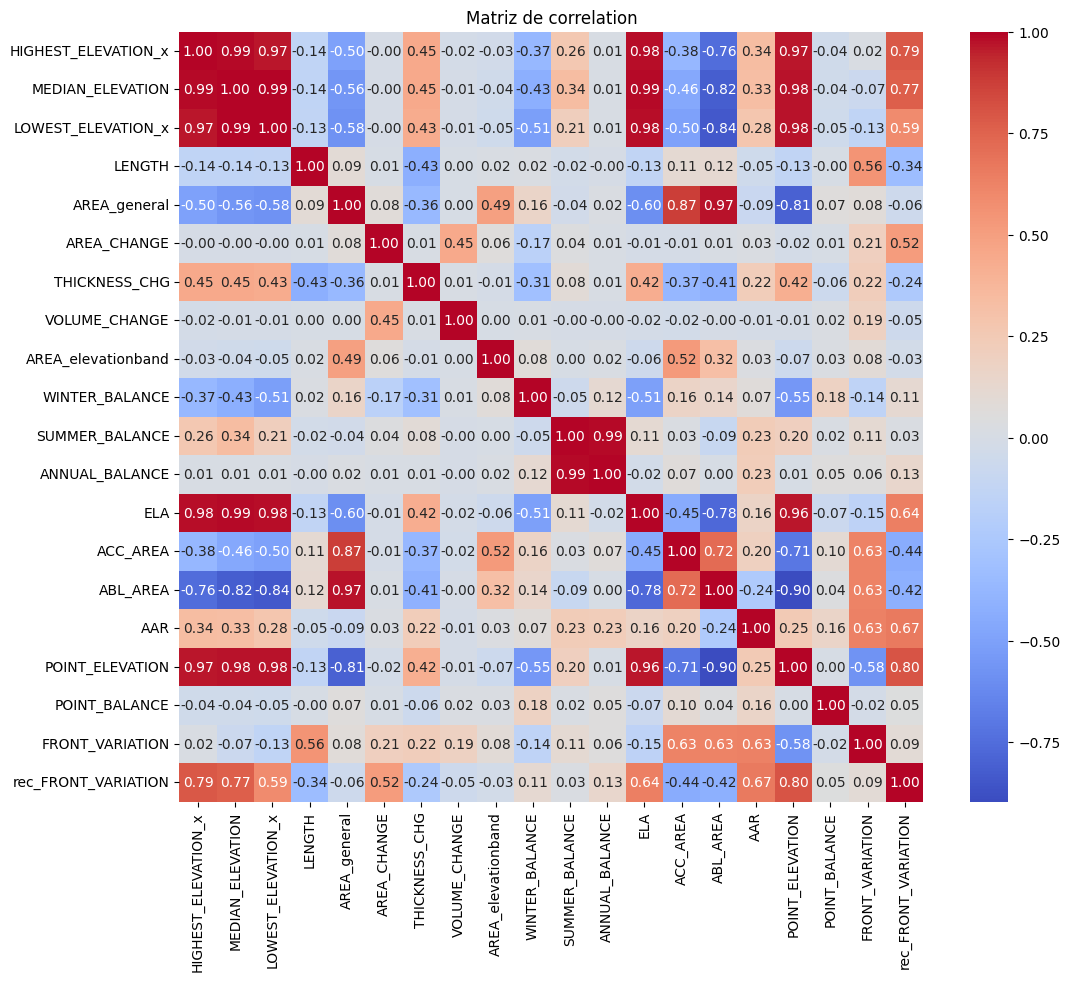

In [ ]:
# Creamos y mostramos una matriz de correlación entre variables:

corr_matrix = final_merge[columnas_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlation')
plt.show()

In [ ]:
# Calcular el porcentaje de nulos por columnas
porcentaje_nulos_por_columna = (final_merge.isnull().sum() / len(final_merge)) * 100

print("Porcentaje de nulos por columnas:")
print(porcentaje_nulos_por_columna)

Porcentaje de nulos por columnas:
POLITICAL_UNIT                0.000000
NAME                          0.000000
WGMS_ID                       0.000000
LATITUDE                      0.000000
LONGITUDE                     0.000000
GLACIER_REGION_CODE           0.000000
GLACIER_SUBREGION_CODE        0.000000
YEAR                          0.000000
HIGHEST_ELEVATION_x           5.573046
MEDIAN_ELEVATION              5.521509
LOWEST_ELEVATION_x            0.732722
LENGTH                       14.281904
AREA_general                  5.948039
AREA_CHANGE                  20.911774
THICKNESS_CHG                53.528232
VOLUME_CHANGE                56.149258
AREA_elevationband            0.877863
WINTER_BALANCE               17.519244
SUMMER_BALANCE               17.606921
ANNUAL_BALANCE                0.659154
ELA                           1.049286
ACC_AREA                      1.852679
ABL_AREA                      1.853323
AAR                           1.207504
POINT_ELEVATION               

In [ ]:
#Agrupamos nuestro dataset para que cada fila sea un glaciar en un año:

# Definimos las columnas que no queremos promediar
columns_to_exclude = ['POLITICAL_UNIT', 'WGMS_ID', 'LATITUDE', 'LONGITUDE', 'GLACIER_REGION_CODE']

# Seleccionamos solo las columnas numéricas para calcular la media
numeric_columns = final_merge.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Agrupamos por 'NAME' y 'YEAR', y calculamos la media de las columnas numéricas
grouped_df = final_merge.groupby(['NAME', 'YEAR'], as_index=False)[numeric_columns].mean()

In [ ]:
# Mostramos el resultado:

grouped_df.head(20)

,NAME,WGMS_ID,LATITUDE,LONGITUDE,YEAR,HIGHEST_ELEVATION_x,MEDIAN_ELEVATION,LOWEST_ELEVATION_x,LENGTH,AREA_general,...,POINT_ELEVATION,POINT_BALANCE,FRONT_VARIATION,rec_FRONT_VARIATION,ET_SURGE,ET_CALVING,ET_FLOOD,ET_AVALANCHE,ET_TECTONIC,ET_OTHER
0,7A,2906.0,-53.006699,73.342003,1947.0,550.0,400.0,250.0,1150.00000,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,7A,2906.0,-53.006699,73.342003,1990.0,550.0,425.0,300.0,699.99999,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,7B,2907.0,-53.008301,73.347000,1947.0,550.0,375.0,200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,7B,2907.0,-53.008301,73.347000,1990.0,550.0,390.0,230.0,940.00000,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,8A,2908.0,-53.009998,73.349998,1947.0,450.0,325.0,200.0,589.99997,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,8A,2908.0,-53.009998,73.349998,1990.0,450.0,335.0,220.0,600.00002,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6,8B,2909.0,-53.011700,73.351997,1947.0,450.0,335.0,220.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,8B,2909.0,-53.011700,73.351997,1990.0,450.0,335.0,220.0,600.00002,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8,A NEUVE GLACIER DE L'-N,4615.0,45.946499,7.053080,2010.0,3548.0,2962.0,2611.0,1950.00000,884.99999,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,A NEUVE GLACIER DE L'-S,4614.0,45.935699,7.054440,2010.0,3771.0,2772.0,2068.0,1830.00000,1919.00000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Crearemos una función para cambiar los valores de eventos especiales de 0.5 a 1, ya que al ser la media anual implica que sí ha sucedido

def special_event_mean(value):
  if value == 0.5:
    return 1
  else:
    return value
grouped_df[['ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_AVALANCHE', 'ET_TECTONIC', 'ET_OTHER']] = grouped_df[['ET_SURGE', 'ET_CALVING', 'ET_FLOOD', 'ET_AVALANCHE', 'ET_TECTONIC', 'ET_OTHER']].applymap(special_event_mean)

In [ ]:
# Comprobamos cantidad de nulos:

grouped_df.isna().sum()

NAME                       0
WGMS_ID                    0
LATITUDE                   0
LONGITUDE                  0
YEAR                       0
HIGHEST_ELEVATION_x     5419
MEDIAN_ELEVATION        5499
LOWEST_ELEVATION_x      1447
LENGTH                  5938
AREA_general            5252
AREA_CHANGE             8690
THICKNESS_CHG           8653
VOLUME_CHANGE           8808
AREA_elevationband      9221
WINTER_BALANCE          9535
SUMMER_BALANCE          9540
ANNUAL_BALANCE          8983
ELA                     9216
ACC_AREA                9521
ABL_AREA                9521
AAR                     9215
POINT_ELEVATION        10042
POINT_BALANCE          10016
FRONT_VARIATION        10629
rec_FRONT_VARIATION    10629
ET_SURGE                   0
ET_CALVING                 0
ET_FLOOD                   0
ET_AVALANCHE               0
ET_TECTONIC                0
ET_OTHER                   0
dtype: int64

In [ ]:
# Agrupamos las variables numéricas:

columnas_numericas =[ 'HIGHEST_ELEVATION_x',
'MEDIAN_ELEVATION',
'LOWEST_ELEVATION_x',
'LENGTH',
'AREA_general',
'VOLUME_CHANGE',
'ANNUAL_BALANCE',
'ELA',
'ACC_AREA',
'ABL_AREA',
'AAR']

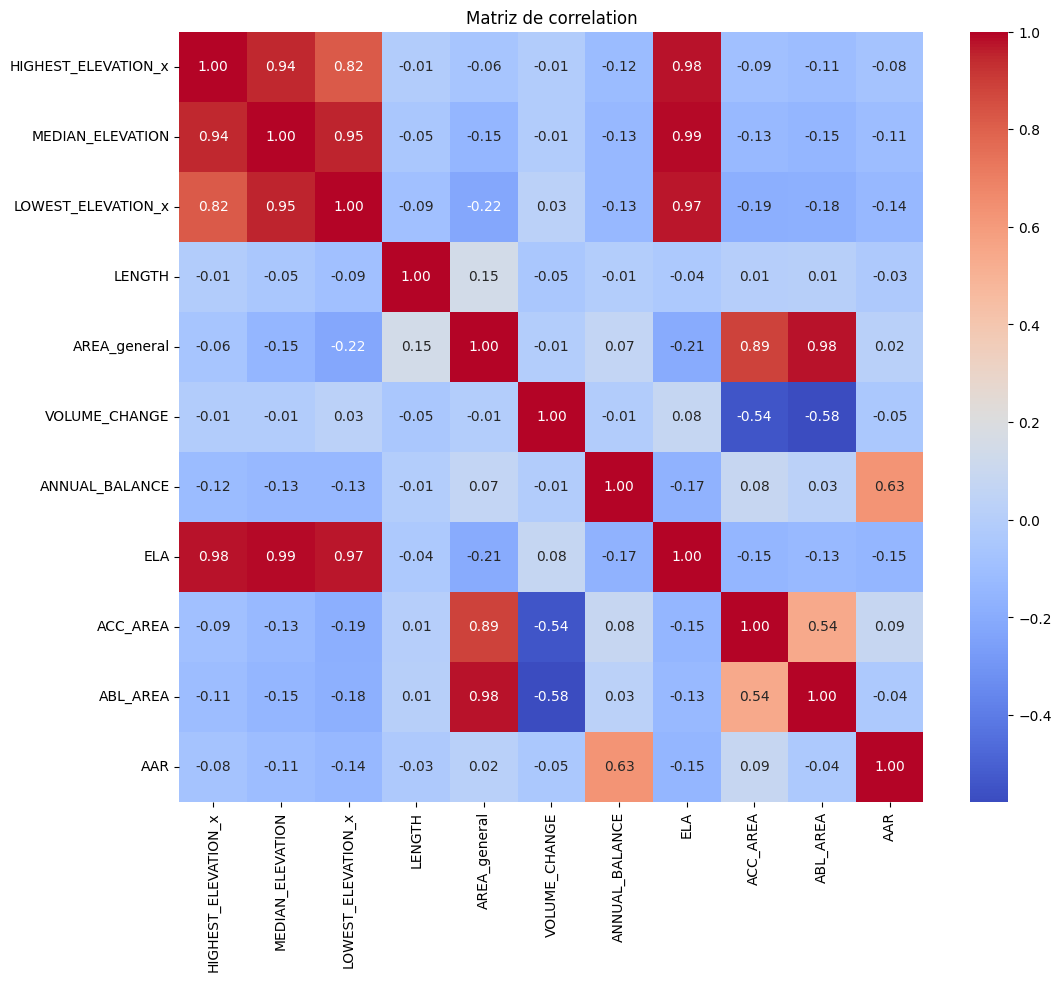

In [ ]:
# Creamos y mostramos una matriz de correlación entre variables:

corr_matrix = grouped_df[columnas_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlation')
plt.show()

In [ ]:
# Eliminaremos todas las columnas que nos dan información redundante o tienen demasiados nulos:

grouped_df = grouped_df.drop(columns=['ELA','ABL_AREA','ACC_AREA','HIGHEST_ELEVATION_x','LOWEST_ELEVATION_x', 'FRONT_VARIATION','rec_FRONT_VARIATION','POINT_ELEVATION','POINT_BALANCE','WINTER_BALANCE','SUMMER_BALANCE','THICKNESS_CHG',"AREA_elevationband", 'AREA_CHANGE', 'VOLUME_CHANGE','AAR','ANNUAL_BALANCE'])

In [ ]:
# Revisamos resultados:

grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10740 entries, 0 to 10739
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              10740 non-null  object 
 1   WGMS_ID           10740 non-null  float64
 2   LATITUDE          10740 non-null  float64
 3   LONGITUDE         10740 non-null  float64
 4   YEAR              10740 non-null  float64
 5   MEDIAN_ELEVATION  5241 non-null   float64
 6   LENGTH            4802 non-null   float64
 7   AREA_general      5488 non-null   float64
 8   ET_SURGE          10740 non-null  float64
 9   ET_CALVING        10740 non-null  float64
 10  ET_FLOOD          10740 non-null  float64
 11  ET_AVALANCHE      10740 non-null  float64
 12  ET_TECTONIC       10740 non-null  float64
 13  ET_OTHER          10740 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
# Revisamos cantidad de nulos:

grouped_df.isna().sum()

NAME                   0
WGMS_ID                0
LATITUDE               0
LONGITUDE              0
YEAR                   0
MEDIAN_ELEVATION    5499
LENGTH              5938
AREA_general        5252
ET_SURGE               0
ET_CALVING             0
ET_FLOOD               0
ET_AVALANCHE           0
ET_TECTONIC            0
ET_OTHER               0
dtype: int64

In [ ]:
# Creamos una nueva variable con solo aquellos valores no nulos:

glacier_data = grouped_df.dropna()

In [ ]:
# Revisamos información del dataset:

glacier_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, 8 to 10739
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              3883 non-null   object 
 1   WGMS_ID           3883 non-null   float64
 2   LATITUDE          3883 non-null   float64
 3   LONGITUDE         3883 non-null   float64
 4   YEAR              3883 non-null   float64
 5   MEDIAN_ELEVATION  3883 non-null   float64
 6   LENGTH            3883 non-null   float64
 7   AREA_general      3883 non-null   float64
 8   ET_SURGE          3883 non-null   float64
 9   ET_CALVING        3883 non-null   float64
 10  ET_FLOOD          3883 non-null   float64
 11  ET_AVALANCHE      3883 non-null   float64
 12  ET_TECTONIC       3883 non-null   float64
 13  ET_OTHER          3883 non-null   float64
dtypes: float64(13), object(1)
memory usage: 455.0+ KB


In [ ]:
# Guardamos el dataset en drive.

glacier_data.to_csv('/content/drive/MyDrive/DATASETS/glacier_data.csv')

### AÑADIMOS **VARIABLES EXOGENAS** 🌎🌡

Añadimos variables externas de una [dataset de temperatura de copernicus](https://medium.com/r?url=https%3A%2F%2Fcds.climate.copernicus.eu%2Fcdsapp%23%21%2Fdataset%2Fprojections-climate-atlas%3Ftab%3Doverview) 🌡


está formado por las siguiente columnas

+ ``cdd`` --> Días secos consecutivos anuales

+  `` pr`` --> Media mensual de precipitación acumulada diaria --> Calculada media anual

+ ``rx1day`` --> Máximo mensual de precipitación acumulada en 1 día --> Calculada media anual

+  `` t ``--> Media mensual de temperatura media diaria --> Calculada media anual

+  ``tn``--> Media mensual de temperatura mínima diaria --> Calculada media anual

✍ el sufijo ``_26`` escenario optimista ``_85`` escenarip pesimista

In [ ]:
# Leemos el dataset con las temperaturas, precipitaciones, etc...

temp_df_cleaned = pd.read_csv('/content/drive/MyDrive/DATASETS/all_data_predictions_1950_2100.csv')
temp_df_cleaned.head(20)

,Year,Latitude,Longitude,PR,PR_rcp26,PR_rcp85,RX1DAY,RX1DAY_rcp26,RX1DAY_rcp85,TN,TN_rcp26,TN_rcp85,T,T_rcp26,T_rcp85,CDD,CDD_rcp26,CDD_rcp85
0,1950,-89.0,-179.0,0.210104,NaN,NaN,1.151218,NaN,NaN,-46.137047,NaN,NaN,-44.590789,NaN,NaN,130.136012,NaN,NaN
1,1950,-89.0,-177.0,0.215458,NaN,NaN,1.178105,NaN,NaN,-46.003121,NaN,NaN,-44.460775,NaN,NaN,125.795663,NaN,NaN
2,1950,-89.0,-175.0,0.218725,NaN,NaN,1.198113,NaN,NaN,-45.896002,NaN,NaN,-44.357907,NaN,NaN,124.784348,NaN,NaN
3,1950,-89.0,-173.0,0.221469,NaN,NaN,1.213710,NaN,NaN,-45.771167,NaN,NaN,-44.240403,NaN,NaN,123.506196,NaN,NaN
4,1950,-89.0,-171.0,0.224200,NaN,NaN,1.231212,NaN,NaN,-45.704203,NaN,NaN,-44.183959,NaN,NaN,123.396148,NaN,NaN
5,1950,-89.0,-169.0,0.228681,NaN,NaN,1.260251,NaN,NaN,-45.564916,NaN,NaN,-44.051648,NaN,NaN,121.204876,NaN,NaN
6,1950,-89.0,-167.0,0.232439,NaN,NaN,1.285327,NaN,NaN,-45.387457,NaN,NaN,-43.871877,NaN,NaN,120.757173,NaN,NaN
7,1950,-89.0,-165.0,0.237047,NaN,NaN,1.320613,NaN,NaN,-45.238663,NaN,NaN,-43.728819,NaN,NaN,123.129041,NaN,NaN
8,1950,-89.0,-163.0,0.242912,NaN,NaN,1.357893,NaN,NaN,-45.104576,NaN,NaN,-43.600471,NaN,NaN,121.591123,NaN,NaN
9,1950,-89.0,-161.0,0.247836,NaN,NaN,1.383332,NaN,NaN,-44.988798,NaN,NaN,-43.488447,NaN,NaN,120.009564,NaN,NaN


In [ ]:
# Comprobamos resultados:

temp_df_cleaned.head(15)

,Year,Latitude,Longitude,PR,PR_rcp26,PR_rcp85,RX1DAY,RX1DAY_rcp26,RX1DAY_rcp85,TN,TN_rcp26,TN_rcp85,T,T_rcp26,T_rcp85,CDD,CDD_rcp26,CDD_rcp85
0,1950,-89.0,-179.0,0.210104,NaN,NaN,1.151218,NaN,NaN,-46.137047,NaN,NaN,-44.590789,NaN,NaN,130.136012,NaN,NaN
1,1950,-89.0,-177.0,0.215458,NaN,NaN,1.178105,NaN,NaN,-46.003121,NaN,NaN,-44.460775,NaN,NaN,125.795663,NaN,NaN
2,1950,-89.0,-175.0,0.218725,NaN,NaN,1.198113,NaN,NaN,-45.896002,NaN,NaN,-44.357907,NaN,NaN,124.784348,NaN,NaN
3,1950,-89.0,-173.0,0.221469,NaN,NaN,1.213710,NaN,NaN,-45.771167,NaN,NaN,-44.240403,NaN,NaN,123.506196,NaN,NaN
4,1950,-89.0,-171.0,0.224200,NaN,NaN,1.231212,NaN,NaN,-45.704203,NaN,NaN,-44.183959,NaN,NaN,123.396148,NaN,NaN
5,1950,-89.0,-169.0,0.228681,NaN,NaN,1.260251,NaN,NaN,-45.564916,NaN,NaN,-44.051648,NaN,NaN,121.204876,NaN,NaN
6,1950,-89.0,-167.0,0.232439,NaN,NaN,1.285327,NaN,NaN,-45.387457,NaN,NaN,-43.871877,NaN,NaN,120.757173,NaN,NaN
7,1950,-89.0,-165.0,0.237047,NaN,NaN,1.320613,NaN,NaN,-45.238663,NaN,NaN,-43.728819,NaN,NaN,123.129041,NaN,NaN
8,1950,-89.0,-163.0,0.242912,NaN,NaN,1.357893,NaN,NaN,-45.104576,NaN,NaN,-43.600471,NaN,NaN,121.591123,NaN,NaN
9,1950,-89.0,-161.0,0.247836,NaN,NaN,1.383332,NaN,NaN,-44.988798,NaN,NaN,-43.488447,NaN,NaN,120.009564,NaN,NaN


In [ ]:
# Cambiamos el nombre de la columna 'Year' para luego hacer el merge correctamente:

temp_df_cleaned.rename(columns = {'Year':'YEAR'}, inplace = True)

In [ ]:
# Comprobamos resultados

temp_df_cleaned.head()

,YEAR,Latitude,Longitude,PR,PR_rcp26,PR_rcp85,RX1DAY,RX1DAY_rcp26,RX1DAY_rcp85,TN,TN_rcp26,TN_rcp85,T,T_rcp26,T_rcp85,CDD,CDD_rcp26,CDD_rcp85
0,1950,-89.0,-179.0,0.210104,NaN,NaN,1.151218,NaN,NaN,-46.137047,NaN,NaN,-44.590789,NaN,NaN,130.136012,NaN,NaN
1,1950,-89.0,-177.0,0.215458,NaN,NaN,1.178105,NaN,NaN,-46.003121,NaN,NaN,-44.460775,NaN,NaN,125.795663,NaN,NaN
2,1950,-89.0,-175.0,0.218725,NaN,NaN,1.198113,NaN,NaN,-45.896002,NaN,NaN,-44.357907,NaN,NaN,124.784348,NaN,NaN
3,1950,-89.0,-173.0,0.221469,NaN,NaN,1.213710,NaN,NaN,-45.771167,NaN,NaN,-44.240403,NaN,NaN,123.506196,NaN,NaN
4,1950,-89.0,-171.0,0.224200,NaN,NaN,1.231212,NaN,NaN,-45.704203,NaN,NaN,-44.183959,NaN,NaN,123.396148,NaN,NaN


In [ ]:
# Revisamos la información del dataset:

temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446200 entries, 0 to 2446199
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   YEAR          int64  
 1   Latitude      float64
 2   Longitude     float64
 3   PR            float64
 4   PR_rcp26      float64
 5   PR_rcp85      float64
 6   RX1DAY        float64
 7   RX1DAY_rcp26  float64
 8   RX1DAY_rcp85  float64
 9   TN            float64
 10  TN_rcp26      float64
 11  TN_rcp85      float64
 12  T             float64
 13  T_rcp26       float64
 14  T_rcp85       float64
 15  CDD           float64
 16  CDD_rcp26     float64
 17  CDD_rcp85     float64
dtypes: float64(17), int64(1)
memory usage: 335.9 MB


#### MERGEAMOS🧨🧨🧨 temperaturas🌍 + glaciares 🧊

In [ ]:
# Renombramos las columnas de Latitud y Longitud del dataset de temperaturas:

temp_df_to_merge = temp_df_cleaned.rename(
    columns={"Latitude": "LATITUDE_temp", "Longitude": "LONGITUDE_temp"}
)

In [ ]:
# Realizaremos el merge de ambos datasets en base al año y a las coordenadas:

def find_closest_temperature_measurement(
    temp_df: pd.DataFrame, year: int, latitude: float, longitude: float
) -> Union[pd.Series, None]:
    year_df = temp_df[temp_df["YEAR"] == year]
    if len(year_df) == 0:
      return None
    year_coords = year_df[["LATITUDE_temp", "LONGITUDE_temp"]]
    coords = np.array([latitude, longitude]).reshape(1, -1)
    distances = np.linalg.norm(year_coords - coords, axis=1)
    closest_index = distances.argmin()
    return year_df.iloc[closest_index]


def merge_temperature_data(
    glacier_data: pd.DataFrame, temp_df: pd.DataFrame
) -> pd.DataFrame:
    merged_data = glacier_data.copy()
    merged_data["temp_index"] = -1
    for i, row in glacier_data.iterrows():
        temperature_data = find_closest_temperature_measurement(
            temp_df, row["YEAR"], row["LATITUDE"], row["LONGITUDE"]
        )
        if temperature_data is None:
            continue
        merged_data.loc[i, "temp_index"] = temperature_data.name
    merged_data = merged_data.merge(
        temp_df, left_on="temp_index", right_index=True, suffixes=("", "_temp")
    )
    merged_data.drop(columns=["temp_index"], inplace=True)
    return merged_data


merged_df = merge_temperature_data(glacier_data, temp_df_to_merge)

In [ ]:
# Mostramos la información del merge

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 8 to 10707
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              3854 non-null   object 
 1   WGMS_ID           3854 non-null   float64
 2   LATITUDE          3854 non-null   float64
 3   LONGITUDE         3854 non-null   float64
 4   YEAR              3854 non-null   float64
 5   MEDIAN_ELEVATION  3854 non-null   float64
 6   LENGTH            3854 non-null   float64
 7   AREA_general      3854 non-null   float64
 8   ET_SURGE          3854 non-null   float64
 9   ET_CALVING        3854 non-null   float64
 10  ET_FLOOD          3854 non-null   float64
 11  ET_AVALANCHE      3854 non-null   float64
 12  ET_TECTONIC       3854 non-null   float64
 13  ET_OTHER          3854 non-null   float64
 14  YEAR_temp         3854 non-null   int64  
 15  LATITUDE_temp     3854 non-null   float64
 16  LONGITUDE_temp    3854 non-null   float64
 17 

In [ ]:
merged_df.head(30)

,NAME,WGMS_ID,LATITUDE,LONGITUDE,YEAR,MEDIAN_ELEVATION,LENGTH,AREA_general,ET_SURGE,ET_CALVING,...,RX1DAY_rcp85,TN,TN_rcp26,TN_rcp85,T,T_rcp26,T_rcp85,CDD,CDD_rcp26,CDD_rcp85
8,A NEUVE GLACIER DE L'-N,4615.0,45.946499,7.05308,2010.0,2962.0,1950.00000,884.999990,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
9,A NEUVE GLACIER DE L'-S,4614.0,45.935699,7.05444,2010.0,2772.0,1830.00000,1919.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
352,ANGRONIETTES GLACIER DES,5664.0,45.863899,7.11031,2010.0,2733.0,270.00001,118.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
461,AROLLA (BAS),377.0,45.980000,7.50000,2010.0,3086.0,5110.00010,5434.999900,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
462,AROLLA HAUT GLACIER D' (PART OF B73/32N),5581.0,45.973202,7.52250,2010.0,2980.0,3690.00010,3457.999900,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
541,AVRIL,5640.0,45.915699,7.34843,2010.0,3106.0,190.00000,21.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
542,AVRIL-II,5646.0,45.917500,7.35100,2010.0,3004.0,200.00000,11.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
787,BECCA RAYETTE,5634.0,45.913898,7.41931,2010.0,3371.0,250.00000,37.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
919,BIONNASSAY,1313.0,45.846802,6.81280,2010.0,3000.0,5000.00000,4750.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499
1017,BOCHERESSE GLACIER DE,5645.0,45.984901,7.32250,2010.0,2931.0,949.99999,222.000000,0.0,0.0,...,17.903225,NaN,6.386044,5.780021,NaN,9.98806,9.793179,NaN,22.733585,20.983499


In [ ]:
# Comprobamos cantidad de nulos en el dataset

merged_df.isna().sum()

NAME                   0
WGMS_ID                0
LATITUDE               0
LONGITUDE              0
YEAR                   0
MEDIAN_ELEVATION       0
LENGTH                 0
AREA_general           0
ET_SURGE               0
ET_CALVING             0
ET_FLOOD               0
ET_AVALANCHE           0
ET_TECTONIC            0
ET_OTHER               0
YEAR_temp              0
LATITUDE_temp          0
LONGITUDE_temp         0
PR                  1873
PR_rcp26            1981
PR_rcp85            1981
RX1DAY              1873
RX1DAY_rcp26        1981
RX1DAY_rcp85        1981
TN                  1873
TN_rcp26            1981
TN_rcp85            1981
T                   1873
T_rcp26             1981
T_rcp85             1981
CDD                 1873
CDD_rcp26           1981
CDD_rcp85           1981
dtype: int64

In [ ]:
# Rellenamos las columnas vacías de los datos meteorológicos:

merged_df['PR'] = merged_df['PR'].fillna(merged_df['PR_rcp85'])
merged_df[['PR_rcp85', 'PR_rcp26']] = merged_df[['PR_rcp85', 'PR_rcp26']].fillna(merged_df['PR'])

merged_df['RX1DAY'] = merged_df['RX1DAY'].fillna(merged_df['RX1DAY_rcp85'])
merged_df[['RX1DAY_rcp85', 'RX1DAY_rcp26']] = merged_df[['RX1DAY_rcp85', 'RX1DAY_rcp26']].fillna(merged_df['RX1DAY'])#

merged_df['TN'] = merged_df['TN'].fillna(merged_df['TN_rcp85'])
merged_df[['TN_rcp85', 'TN_rcp26']] = merged_df[['TN_rcp85', 'TN_rcp26']].fillna(merged_df['TN'])

merged_df['T'] = merged_df['T'].fillna(merged_df['T_rcp85'])
merged_df[['T_rcp85', 'T_rcp26']] = merged_df[['T_rcp85', 'T_rcp26']].fillna(merged_df['T'])

merged_df['CDD'] = merged_df['CDD'].fillna(merged_df['CDD_rcp85'])
merged_df[['CDD_rcp85', 'CDD_rcp26']] = merged_df[['CDD_rcp85', 'CDD_rcp26']].fillna(merged_df['CDD'])

In [ ]:
# Revisamos resultados:

merged_df.head()

,NAME,WGMS_ID,LATITUDE,LONGITUDE,YEAR,MEDIAN_ELEVATION,LENGTH,AREA_general,ET_SURGE,ET_CALVING,...,RX1DAY_rcp85,TN,TN_rcp26,TN_rcp85,T,T_rcp26,T_rcp85,CDD,CDD_rcp26,CDD_rcp85
8,A NEUVE GLACIER DE L'-N,4615.0,45.946499,7.05308,2010.0,2962.0,1950.00000,884.99999,0.0,0.0,...,17.903225,5.780021,6.386044,5.780021,9.793179,9.98806,9.793179,20.983499,22.733585,20.983499
9,A NEUVE GLACIER DE L'-S,4614.0,45.935699,7.05444,2010.0,2772.0,1830.00000,1919.00000,0.0,0.0,...,17.903225,5.780021,6.386044,5.780021,9.793179,9.98806,9.793179,20.983499,22.733585,20.983499
352,ANGRONIETTES GLACIER DES,5664.0,45.863899,7.11031,2010.0,2733.0,270.00001,118.00000,0.0,0.0,...,17.903225,5.780021,6.386044,5.780021,9.793179,9.98806,9.793179,20.983499,22.733585,20.983499
461,AROLLA (BAS),377.0,45.980000,7.50000,2010.0,3086.0,5110.00010,5434.99990,0.0,0.0,...,17.903225,5.780021,6.386044,5.780021,9.793179,9.98806,9.793179,20.983499,22.733585,20.983499
462,AROLLA HAUT GLACIER D' (PART OF B73/32N),5581.0,45.973202,7.52250,2010.0,2980.0,3690.00010,3457.99990,0.0,0.0,...,17.903225,5.780021,6.386044,5.780021,9.793179,9.98806,9.793179,20.983499,22.733585,20.983499


In [ ]:
# Guardamos el dataset final como .csv:

merged_df.to_csv('/content/drive/MyDrive/DATASETS/dataset_final_glaciar_temperatura.csv')